# A - SETUP

### Import libs

In [237]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import warnings
warnings.filterwarnings("ignore")

### Common class and methods for coloring and display

In [238]:
# Setup default environment for display data and charts
def setup_env(seaborn_style = 'ticks', context='paper', max_columns = 200, max_rows=200):
    sns.set_style(seaborn_style)
    sns.set_context(context)
    #sns.set_palette(Cplan.get_palete("blues"))
    pd.set_option("display.max_columns", max_columns, "display.max_rows", max_rows,"display.max_colwidth", 200)
    return

In [239]:
# Color class
class Cplan:
    palettes={
                "default_palette":["#a9a9a9","#1B5886" ,"#F37413","#4c8e06"], #Grey, Blue, Orange
                "oranges" : ['#F7D53D', '#ECBD22', '#F7A400', '#F38701', '#F37413'],
                "oranges_r" : ['#F37413','#F38701','#F7A400',"#ECBD22","#F7D53D"],
                "greys" : ['#ffffff','#eeeeee','#dddddd','#cccccc','#bebebe','#a9a9a9','#949494','#636363'],
                "greys_r" : ['#636363','#949494','#a9a9a9','#bebebe','#cccccc','#dddddd',"#eeeeee","#ffffff"],
                "blues" : ['#deecfb', '#9FE7F5', '#6EB1D6', '#5293BB', '#3776A1', '#1B5886', '#003A6B'],
                "blues_r" : ['#003A6B','#1B5886','#3776A1','#5293BB','#6EB1D6','#9FE7F5','#deecfb'],
                "greens" : ['#d1face', '#73d802', '#4c8e06', '#163805'],
                "greens_r" : ['#163805','#4c8e06','#73d802','#d1face'],
            }
    highlight_color="#1B5886"
    base_color = "#a9a9a9"
    
    @staticmethod
    def print_palettes(palette = "default_palette"):
        colors={} 

        if (palette == "a") | (palette == "A"):
            colors = Cplan.palettes
        else:
            if palette in Cplan.palettes.keys():
                colors[palette] = Cplan.palettes[palette]

        if len(colors)>0:       
            for item in colors:
                display(Markdown(f'<span style="font-family: monospace">{item}</span>'))
                display(Markdown('<br>'.join(
                    f'<span style="font-family: monospace">{color} <span style="color: {color}">████████</span></span>'
                    for color in colors[item]
                )))
        else:
            display(Markdown('<br>'.join(
            f'<span style="font-family: monospace">{color_name}</span>'
            for color_name in Cplan.palettes.keys()
            )))
    @classmethod
    def get_palette(cls,palette= "default_palette"):
        return cls.palettes[palette]
       
    @classmethod
    def reset_color(cls):
        cls.highlight_color="#F37413"
        cls.base_color = "#a9a9a9"

In [240]:
# Set hightlight color on chart
def set_highlight(val,data = None, gtype='color', g=None):
    if gtype=='color':
        palete=[Cplan.highlight_color if x==val else Cplan.base_color for x in data]
        return palete
    if gtype=='xtick':
        for tick_label in g.axes.get_xticklabels():
            if tick_label.get_text()==val:
                tick_label.set_color(Cplan.highlight_color)
                tick_label.set_fontsize("10")
                tick_label.set_fontweight("800")
        return
    if gtype=='ytick':
        for tick_label in g.axes.get_yticklabels():
            if tick_label.get_text()==val:
                tick_label.set_color(Cplan.highlight_color)
                tick_label.set_fontsize("10")
                tick_label.set_fontweight("800")
        return

In [241]:
# Plot custom text on chart
def set_text(g,x,y,text):
    g.text(x, y, text, 
       fontsize = 10,          # Size
       #fontstyle = "oblique",  # Style
       color = Cplan.highlight_color,          # Color
       ha = "center", # Horizontal alignment
       va = "bottom",
        rotation = 0,
    )
    return

In [242]:
# Remove borders of chart
def remove_border(g,left=False, right = True, top=True, bottom  = False):
    g.spines['top'].set_visible(top)
    g.spines['right'].set_visible(right)
    g.spines['left'].set_visible(left)
    g.spines['bottom'].set_visible(bottom)
    
    return

### Common methods for data preparation

In [243]:
def view_description(des,var_col = 'Variables', var_name = ''):
    return des[des[var_col] == var_name]

In [244]:
#Examining dataset missing values
def examine_data(data, visualize_missing = False, thres=0, figsize=(8,4), annotation=False, savefig=False, filename=''):
    null_data = data.isnull().sum()
    types = data.dtypes
    dtypes=[types[x] for x in null_data.index]
    examine_df =pd.DataFrame({"COLUMN_NAME": null_data.index,
                "NULL_COUNT": null_data.values,
                "DTYPE": dtypes})
    examine_df["NULL_PERCENT"]=examine_df["NULL_COUNT"]/len(data)*100
    examine_df["VARIABLE_TYPE"]=examine_df.DTYPE.apply(lambda x: "categorical" if x==object else "numerical")
    examine_df["HANDLING_METHOD"]="NA"
    
    # plotting missing data
    if visualize_missing== True:
        #colors=[Cplan.highlight_color]
        plot_data = examine_df[examine_df['NULL_PERCENT']>thres]
        if len(plot_data)>0:
            plot = examine_df[examine_df['NULL_PERCENT']>thres].plot(kind='bar',x='COLUMN_NAME',y='NULL_PERCENT',
                                                                legend=None,
                                                                #title='% of null values',fontsize = 12,
                                                                figsize=figsize)#, color=colors)
            #plt.legend(['% of Null values'],loc = 'best', bbox_to_anchor=(1., 1.), fontsize = 8)
            plt.title('Percentage of null values in each column',fontdict={'size':12, 'weight':800, 'color':Cplan.highlight_color})
            plt.xlabel(xlabel='COLUMN_NAME',fontdict={'size':10, 'weight':800, 'color':Cplan.highlight_color})
            plt.ylabel(ylabel='NULL_PERCENT (%)',fontdict={'size':10, 'weight':800, 'color':Cplan.highlight_color})
            if annotation==True:
                for bar in plot.patches:
                    plot.annotate(format(bar.get_height(), '.2f'),
                                   (bar.get_x() + bar.get_width() / 2,
                                    bar.get_height()), ha='center', va='center',
                                   size=8, xytext=(0, 5),
                                   textcoords='offset points')
            if savefig==True:
                #filename = 'Images\\missing_values_thres'+ str(thres) + '.png'
                plt.savefig(filename, dpi=100, bbox_inches="tight")
            plt.show()
    return examine_df

In [245]:
# Missing values imputation
def impute(data, col, func, val=np.nan):
    clean_data = data
    
    if func=='replace':
        clean_data[col].fillna(val, inplace=True)
        
    elif func=='mean':
        fill_val = data[col].mean()
        clean_data[col].fillna(fill_val, inplace=True)
        
    elif func=='median':
        fill_val = data[col].median()
        clean_data[col].fillna(fill_val, inplace=True)
        
    elif func=='mode':
        fill_val = data[col].mode()[0]
        clean_data[col].fillna(fill_val, inplace=True)
        
    elif func == 'drop':
        clean_data.drop(col, axis=1, inplace=True)
    elif func == 'remove':
        #clean_data.dropna( axis=0, inplace=True)
        clean_data = data[~(data[col].isnull())]
    else:
        return 'Invalid func. Valid: mean, median, mode,drop ,value'
    
    return clean_data

### Common methods for data analysis and visualization

In [246]:
# Plot custom chart to univariate analyze
def uni_plot(data, col, var_type = "numerical", n_sub = (1,2), 
                 bins=50, rotation=0, figsize=(8,4), face_highlight=False, text_highlight=False,
                savefig=False, filename='univariate_n.png'):
    fig, axes = plt.subplots(nrows=n_sub[0], ncols=n_sub[1], figsize=figsize)
    titles=[col,col]
    xlabels=[" ", " "]
    ylabels=[" ", " "]
    
    if (var_type== "numerical") | (var_type== "n"):
        #titles=[col + "-Histogram",col+ "-Boxplot"]
        h = sns.histplot(data, x=col,color=Cplan.highlight_color,bins=bins,ax=axes[0])
        b = sns.boxplot(data, x=col,color=Cplan.highlight_color,width=0.6, 
                        linewidth = 1.2,medianprops={"color": "#F37413"},ax=axes[1])
        
        for i,text in enumerate(titles):
            axes[i].set_title(text)
            axes[i].set_xlabel(xlabels[i])
            axes[i].set_ylabel(ylabels[i])
    
    if (var_type== "category") | (var_type== "c"):
        #titles=[col + "-Bar",col+ "-Pie"]
        ylabels=["Percentage", " "]
        s = data[col].value_counts(normalize = True)*100
        explode=[0.1 if x==s.max() else 0 for x in s]
        if face_highlight==True:
            colors=sns.color_palette(set_highlight(val=s.max(),data=s))
        else:
            colors=sns.color_palette()
        b = sns.barplot(x=s.index,y=s.values, ax=axes[0], palette=colors)
        p,texts,autotexts = axes[1].pie(s,autopct='%.1f%%',explode=explode, 
                                        textprops={'fontsize': 8}, pctdistance=1.1)#, colors=colors)
        
        p_legend = axes[1].legend(s.index, loc = 'best', bbox_to_anchor=(1., 0.9), fontsize = 8)
        if text_highlight==True:
            set_highlight(val=s.index[0],gtype='xtick',g=b)
        for i,text in enumerate(titles):
            axes[i].set_title(text)
            axes[i].set_xlabel(xlabels[i])
            axes[i].set_ylabel(ylabels[i])
            axes[i].tick_params(axis='x',rotation=rotation)
    
    if savefig == True:
        plt.savefig(filename, dpi=100, bbox_inches="tight")
    
    fig.tight_layout()
    plt.show()
    return

In [247]:
# Plot charts to bivariate analyze
def bi_plot(data, col,target='TARGET',var_type = "numerical", aggfunc='count',
                n_sub = (1,2), transform=True,
                bins=50, rotation=0, figsize=(8,4), face_highlight=False, text_highlight=False,
               savefig=False, filename=''):
    
    titles=[col,col]
    xlabels=[" ", " "]
    ylabels=[" ", " "]
    
    if (var_type== "numerical") | (var_type== "n"):
        titles=[' ',' ']
        xlabels=['', target]
        ylabels=[col, " "]
        fig, axes = plt.subplots(nrows=n_sub[0], ncols=n_sub[1], figsize=figsize)
        h = sns.histplot(data, y=col,hue=target ,hue_order =[0,1],
                         palette=[Cplan.base_color,Cplan.highlight_color],bins=bins,ax=axes[0])
        #b = sns.boxplot(data, x=target,y=col,palette=[Cplan.base_color,Cplan.highlight_color],width=0.6, 
        #                linewidth = 1.2,medianprops={"color": "#F37413"},ax=axes[1])
        sns.violinplot(data,y=col,x=target,palette=[Cplan.base_color,Cplan.highlight_color])
        
        for i,text in enumerate(titles):
            axes[i].set_title(text)
            axes[i].set_xlabel(xlabels[i])
            axes[i].set_ylabel(ylabels[i])
    
    if (var_type == "category") | (var_type == "c"):
        titles=['Distribution of values','% in target segments']
        fig, axes = plt.subplots(nrows=n_sub[0], ncols=n_sub[1], figsize=figsize, sharey=True)
        xlabels=["Count", "Percent(%)"]
        #Prepare data
        if transform==False:
            d=pd.crosstab(index=data[target], columns=data[col])
            d1=pd.crosstab(index=data[target], columns=data[col], normalize='index')*100
            ylabels=[target, " "]
            legend_title=col
        else:
            ylabels=[col, " "]
            legend_title=target
            d=pd.crosstab(index=data[col], columns=data[target])
            #sort_value = 1
            #d.sort_values(by=sort_value, ascending=True, inplace=True)
            d=d.reindex(data[col].value_counts(ascending = True).index)
            d1=pd.crosstab(index=data[col], columns=data[target], normalize='index')*100
            d1 = d1.reindex(d.index)
        if face_highlight==True:
            colors=sns.color_palette(set_highlight(val=1, data=d.columns))
        else:
            colors=sns.color_palette()
        
        d.plot(kind='barh', stacked=True, ax=axes[0], color=colors)
        axes[0].legend([],[],frameon=False)
        d1.plot(kind='barh', stacked=True,ax=axes[1], color=colors)
        p_legend = axes[1].legend(d.columns,title=legend_title ,loc = 'best', bbox_to_anchor=(1., 1.), fontsize = 8)
        #if text_highlight==True:
        #    set_highlight(val=s.index[0],gtype='xtick',g=b)
        for i,text in enumerate(titles):
            axes[i].set_title(text)
            axes[i].set_xlabel(xlabels[i])
            axes[i].set_ylabel(ylabels[i])
            axes[i].tick_params(axis='x',rotation=rotation)
    
    if savefig == True:
        if len(filename)==0:
            filename = 'Images\\bivariate_' + col + '.png'
        plt.savefig(filename, dpi=100, bbox_inches="tight")
    fig.tight_layout()
    plt.show()
    return

In [248]:
#Visuallize all univariate variables by type
def plot_all(data,cols=[] ,var_type='categorical', ncols=3,chart='histogram', figsize=(10,10),nbins=50,
            savefig = False, filename='plot_all_hist.png'):
    if len(cols)==0:
        a=data.dtypes
        if var_type in ['categorical','c'] :
            cols = a[(a==object)].index
        else:
            cols = a[(a==float)|(a==int)|(a=="int64")].index
    
    #nrows=(len(cols)-1)//ncols + 1
    nrows = int(np.ceil(len(cols)/ncols))
    #fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    plt.figure(figsize=figsize)
    for i,col in enumerate(cols):
        x=i//ncols
        y=i%ncols
        #ax = (axes[y] if nrows==1 else axes[x,y])
        ax = plt.subplot(nrows, ncols, i+1)
        if var_type in ['categorical','c']: #Category
            s=round(data[col].value_counts(normalize=True)*100,1)
            colors=sns.color_palette(set_highlight(val=s.max(),data=s))
            sns.barplot(y=s.index,x=s.values, ax= ax, palette=colors,orient='h',order=s.index)
            ax.tick_params(axis='y',rotation=0, labelsize=8)
            ax.set_xlabel("Percentage (%)",fontsize =10)
            ax.set_ylabel(" ")
        elif var_type in ['numerical','n']:
            if chart=='histogram':
                sns.histplot(data,x=col,bins=nbins ,ax=ax)
            elif chart=='boxplot':
                sns.boxplot(data, x=col,width=0.6,linewidth = 1.2,ax=ax,medianprops={"color": "#F37413"})
            ax.tick_params(axis='both',rotation=0, labelsize=8)
            ax.set_xlabel(" ")
            ax.set_ylabel(" ")
            
        ax.set_title(col,fontdict={'fontsize': 12, 'fontweight' : 500, 'color' : Cplan.highlight_color})
        
    if savefig == True:
        plt.savefig(filename, dpi=100, bbox_inches="tight")
            
    plt.tight_layout()
    plt.show()
    return

### Setup environment

In [249]:
setup_env()

### Reading data from datafiles

In [250]:
data = pd.read_csv('telecom_churn_data.csv')

In [251]:
#check application_data
data.head(3)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,

In [252]:
#Reading column description
column_des = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx",header=0)
#column_des.drop("Unnamed: 0", axis=1, inplace=True)
column_des.head()

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls


In [253]:
column_des.columns = ['Acronyms','Descriptions']
view_description(column_des, var_col='Acronyms' , var_name='STD')


,Acronyms,Descriptions
3,STD,STD calls - outside the calling circle


# B - TELECOM CHURN CASE STUDY

**Will do following steps:**

    1- Data Understanding the Preparation
    2- Exploratory Data Analysis (EDA) 
    3- Data Preparation for Model building
        + Treating Categorical Variables
        + Splitting the Data into Training and Test Sets
        + Class imbalance handling
        + Features Scaling 
    4- Building Model & Making Predictions
    5- Model Evaluation & Interpretation

## 1 - Data Understanding the Preparation

### Data Understanding

In [254]:
#Check size of data
data.shape

(99999, 226)

In [255]:
#View some data
data.head(3)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,...,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [257]:
#Description of variables
column_des

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


### Data Preparation

- Standardising data
- Missing values handling

#### Standardising data

* High Value Customer: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [258]:
churn_data = data.copy()

In [259]:
# Columns hold recharge data
rech_cols = [x for x in data.columns if 'rech' in x]

# Check rech_cols data of one month
rech_cols_6 = [x for x in rech_cols if '_6' in x and 'date' not in x]
churn_data[rech_cols_6].head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6
0,4,362,252,1.0,252.0,0.0,1.0,252.0
1,4,74,44,NaN,NaN,NaN,NaN,NaN
2,5,168,86,NaN,NaN,NaN,NaN,NaN
3,10,230,60,NaN,NaN,NaN,NaN,NaN
4,5,196,56,1.0,56.0,1.0,0.0,56.0


In [260]:
# Find Average recharge amount for good phase (6th and 7th month)
churn_data['gph_average_rech_amt'] = ( churn_data['total_rech_amt_6'].fillna(0) + churn_data['total_rech_amt_7'].fillna(0)) / 2


In [261]:
# 70 percentile of the good_phase_average_rech_amt data
gph_avg_rech_amt_70 = np.percentile(churn_data['gph_average_rech_amt'], 70.0)
print(f'70 Percentile of recharge amount is : {gph_avg_rech_amt_70}')

70 Percentile of recharge amount is : 368.5


In [262]:
# Keep high value customer data
churn_data = churn_data[churn_data.gph_average_rech_amt >= gph_avg_rech_amt_70]

print(f'Shape of high value customer data: {churn_data.shape}')

Shape of high value customer data: (30011, 227)


* There are around 30K rows after filtering

**Tagging Churn:** 

The churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase

In [263]:
churn_data.head()


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,gph_average_rech_amt
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,...,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/3

* There are some vbc columns those should be change the names to common format

In [264]:
# Change the name of columns
churn_data['vbc_3g_6'] = churn_data['jun_vbc_3g']
churn_data['vbc_3g_7'] = churn_data['jul_vbc_3g']
churn_data['vbc_3g_8'] = churn_data['aug_vbc_3g']


In [265]:
# Drop unused columns
churn_data.drop(['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','sep_vbc_3g'], axis=1, inplace=True)

In [266]:
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,...,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,gph_average_rech_amt,vbc_3g_6,vbc_3g_7,vbc_3g_8
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,...,0.0,0.0,NaN,2.06,14.53,31.59,NaN,15.74,15.19,15.14,NaN,5,5,7,3,1580,790,3638,0,1580,790,1580,0,6/27/2014,7/25/2014,8/26/2014,9/30/2014,0,0,779,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,802,1185.0,18.74,19.38,57.74
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/20

In [267]:
service_used_cols = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
churn_data[service_used_cols].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [268]:
# Tagging churn
churn_data['total_using_9'] = churn_data[service_used_cols].sum(axis=1)
churn_data['churn'] = churn_data['total_using_9'].apply(lambda x: 0 if x>0 else 1)
churn_data.drop(['total_using_9'], axis=1, inplace=True)

In [269]:
# Drop all columns of churn phase
churn_phase_columns = [col for col in churn_data.columns if '9' in col]

churn_data.drop(churn_phase_columns, axis=1, inplace=True)

In [270]:
churn_data.shape

(30011, 173)

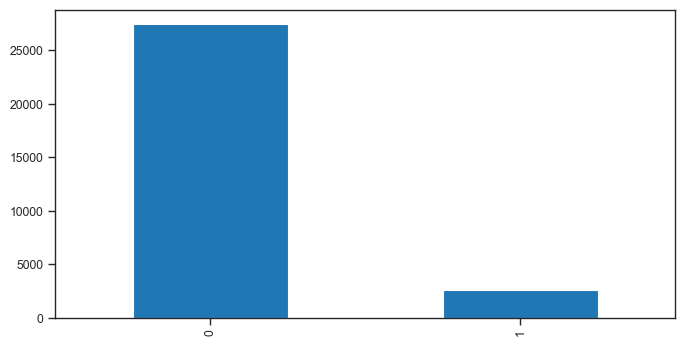

In [271]:
plt.figure(figsize=(8,4))
churn_data.churn.value_counts().plot(kind = 'bar')
plt.show()

#### Remove unused columns

In [272]:
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,gph_average_rech_amt,vbc_3g_6,vbc_3g_7,vbc_3g_8,churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,1185.0,18.74,19.38,57.74,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,

In [273]:
# We drop columns mobile_number, circle_id since they contribute nothing to our analysis
useless_cols = ['mobile_number', 'circle_id']


* We can see some date columns those just mark the last day of periods/the last day of recharge and add no value to analysis => we can drop them.

In [274]:
date_cols = [x for x in churn_data.columns if 'date' in x]
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [275]:
churn_data[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7 to 99997
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   last_date_of_month_6      30011 non-null  object
 1   last_date_of_month_7      29980 non-null  object
 2   last_date_of_month_8      29854 non-null  object
 3   date_of_last_rech_6       29949 non-null  object
 4   date_of_last_rech_7       29897 non-null  object
 5   date_of_last_rech_8       29417 non-null  object
 6   date_of_last_rech_data_6  11397 non-null  object
 7   date_of_last_rech_data_7  11662 non-null  object
 8   date_of_last_rech_data_8  11754 non-null  object
dtypes: object(9)
memory usage: 2.3+ MB


In [276]:
# Drop date columns
churn_data.drop(useless_cols + date_cols, axis=1, inplace=True)

In [277]:
churn_data.shape

(30011, 162)

In [278]:
churn_data.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,gph_average_rech_amt,vbc_3g_6,vbc_3g_7,vbc_3g_8,churn
count,29897.0,29897.0,29897.0,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.0,29708.0,29073.0,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.0,29708.0,29073.0,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,30011.000000,30011.000000,30011.000000,30011.000000,3001

* As we can see that some columns like loc_og_t2o_mou,std_og_t2o_mou,.. contain only one value. These columns contribute nothing to our analysis => we can drop its.

In [279]:
# Check columns holding only 1 unique value
single_val_cols = []

for col in churn_data.columns:
    if churn_data[f'{col}'].nunique() == 1:
        single_val_cols.append(col)

single_val_cols

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [280]:
# Drop those single-value columns
churn_data.drop(single_val_cols, axis=1, inplace=True)

In [281]:
churn_data.shape

(30011, 153)

#### Missing values handling

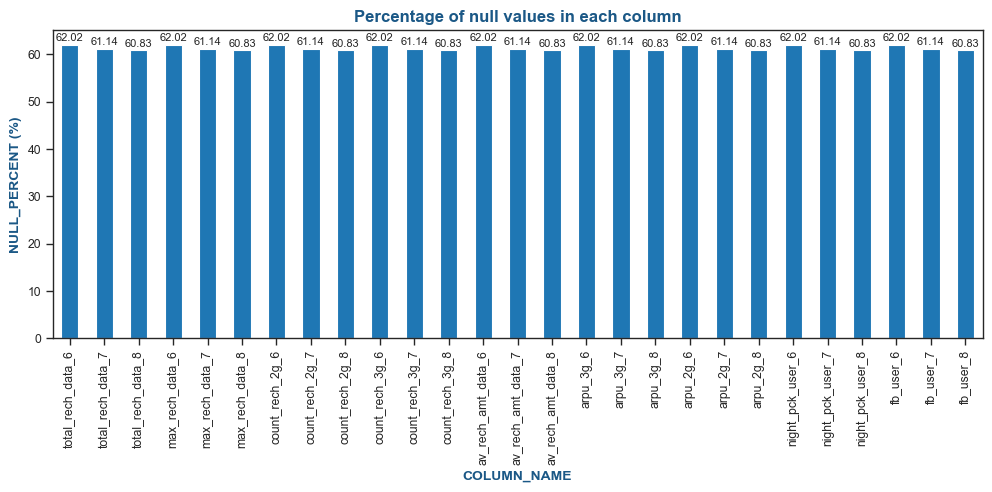

In [282]:
#Inspecting data
data_structure = examine_data(churn_data, visualize_missing=True,thres=40 , figsize=(12,4), annotation=True)

In [283]:
# Drop all columns containing > 40% missing values
drop_cols = data_structure[data_structure.NULL_PERCENT>40]['COLUMN_NAME'].values.tolist()
churn_data.drop(drop_cols, axis=1, inplace=True)


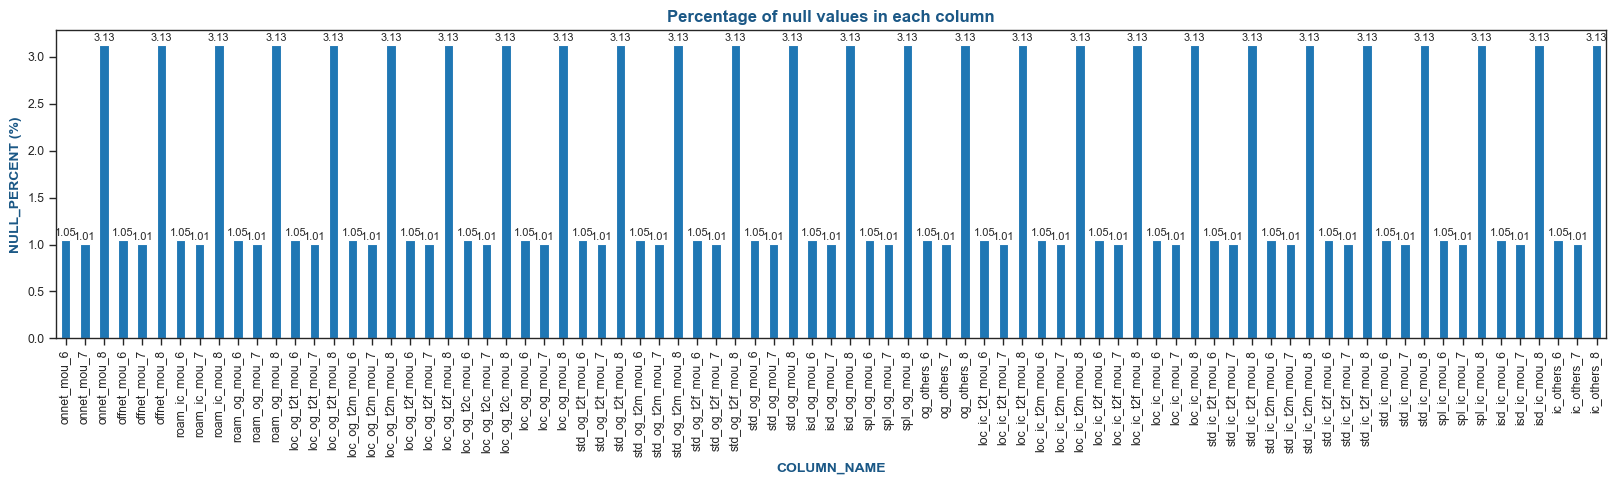

In [284]:
# Check other columns
data_structure = examine_data(churn_data, visualize_missing=True,thres=0 , figsize=(20,4), annotation=True)

* Because small number of rows containing null values, we can remove these rows.

In [285]:
churn_data = churn_data.dropna(axis=0)

In [286]:
# check missing values
churn_data.isnull().sum()

arpu_6                  0
arpu_7                  0
arpu_8                  0
onnet_mou_6             0
onnet_mou_7             0
onnet_mou_8             0
offnet_mou_6            0
offnet_mou_7            0
offnet_mou_8            0
roam_ic_mou_6           0
roam_ic_mou_7           0
roam_ic_mou_8           0
roam_og_mou_6           0
roam_og_mou_7           0
roam_og_mou_8           0
loc_og_t2t_mou_6        0
loc_og_t2t_mou_7        0
loc_og_t2t_mou_8        0
loc_og_t2m_mou_6        0
loc_og_t2m_mou_7        0
loc_og_t2m_mou_8        0
loc_og_t2f_mou_6        0
loc_og_t2f_mou_7        0
loc_og_t2f_mou_8        0
loc_og_t2c_mou_6        0
loc_og_t2c_mou_7        0
loc_og_t2c_mou_8        0
loc_og_mou_6            0
loc_og_mou_7            0
loc_og_mou_8            0
std_og_t2t_mou_6        0
std_og_t2t_mou_7        0
std_og_t2t_mou_8        0
std_og_t2m_mou_6        0
std_og_t2m_mou_7        0
std_og_t2m_mou_8        0
std_og_t2f_mou_6        0
std_og_t2f_mou_7        0
std_og_t2f_m

In [287]:
churn_data.shape

(28861, 126)

* There are no missing values in our dataset

In [288]:
churn_data.churn.value_counts()

0    27054
1     1807
Name: churn, dtype: int64

<br>



## 2 - EXPLORATORY DATA ANALYSIS

### Outliers

In [289]:
data_structure = examine_data(churn_data)
data_structure

,COLUMN_NAME,NULL_COUNT,DTYPE,NULL_PERCENT,VARIABLE_TYPE,HANDLING_METHOD
0,arpu_6,0,float64,0.0,numerical,NA
1,arpu_7,0,float64,0.0,numerical,NA
2,arpu_8,0,float64,0.0,numerical,NA
3,onnet_mou_6,0,float64,0.0,numerical,NA
4,onnet_mou_7,0,float64,0.0,numerical,NA
5,onnet_mou_8,0,float64,0.0,numerical,NA
6,offnet_mou_6,0,float64,0.0,numerical,NA
7,offnet_mou_7,0,float64,0.0,numerical,NA
8,offnet_mou_8,0,float64,0.0,numerical,NA
9,roam_ic_mou_6,0,float64,0.0,numerical,NA


* All columns are numerical

##### Check outliers

In [290]:
churn_data.describe(percentiles=[0.25,0.5,0.75,0.95,0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,gph_average_rech_amt,vbc_3g_6,vbc_3g_7,vbc_3g_8,churn
count,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.00000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.00000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.00000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000
mean,583.567951,594.558340,548.296744,296.272163,309.163947,275.867752,418.632928,431.588700,386.862307,17.350686,13.622360,13.641925,29.124845,22.141013,22.149123,96.345587,98.439796,90.381558,183.901342,185.87273,173.683376,7.124348,7.271403,6.707281,1.579216,1.878539,1.765744,287.38021,291.593068,270.780934,188.470207,201.959683,176.959112,201.182936,216.136208,184.471419,2.034966,2.073900,1.849584,391.692477,420.174180,363.284144,2.067312,2.142616,2.034974,5.926283,7.534818,7.103449,0.687966,0.048995,0.061485,687.764163,721.502555,643.273536,69.70

* Almost all columns have outliers

In [291]:
arpu_cols = [x for x in churn_data.columns if 'arpu' in x]

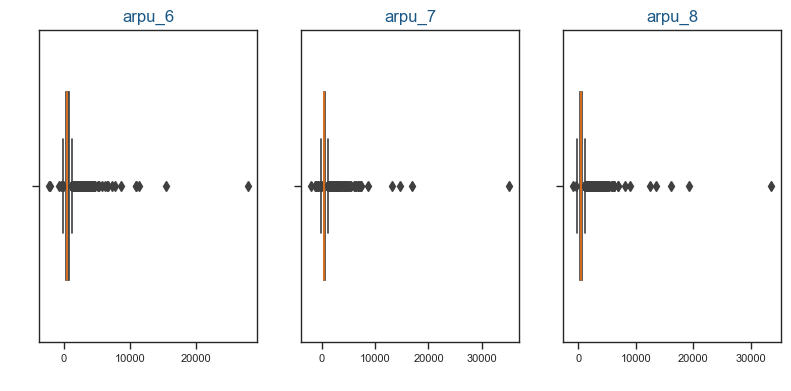

In [292]:
plot_all(data=churn_data, cols=arpu_cols, var_type='n', chart='boxplot', figsize=(8,4))

##### Treating outliers

In [293]:
# Replace outliers with max and min values of range based on 10th and 90th quantile values.
def treating_outliers(data,cols ,low = 0.1, high = 0.9):
    #cols = data.columns
    std_df = data.copy()
    for col in cols:
        q1 = std_df[col].quantile(low)
        q3 = std_df[col].quantile(high)
        iqr = q3-q1
        low_val  = q1-1.5*iqr
        high_val = q3+1.5*iqr
             
        std_df[col] = std_df[col].apply(lambda x: x if x > low_val else low_val)
        std_df[col] = std_df[col].apply(lambda x: x if x < high_val else high_val)
    
    return std_df
    

In [294]:
# Removing outliers below 5th and above 95th percentile
num_cols = data_structure[(data_structure.VARIABLE_TYPE == 'numerical')
                          & (data_structure.COLUMN_NAME != 'churn')]['COLUMN_NAME']
#num_cols
churn_data_std = treating_outliers(churn_data, cols = num_cols)

In [295]:
churn_data_std.describe(percentiles=[0.25,0.5,0.75,0.9])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,gph_average_rech_amt,vbc_3g_6,vbc_3g_7,vbc_3g_8,churn
count,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.0,28861.0,28861.0,28861.000000,28861.000000,28861.000000,28861.000000,28861.0,28861.0,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.0,28861.0,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.0,28861.0,28861.0,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000,28861.000000
mean,575.436834,585.288843,539.716691,285.390250,298.059186,261.981719,409.641613,421.080271,375.774163,8.424022,4.662979,5.085044,16.403677,10.135312,9.888403,78.871768,80.018868,74.112836,177.778843,180.745294,168.645046,5.582056,5.743128,5.230593,1.022993,1.226517,1.161336,277.916229,281.955832,262.377881,176.811114,190.753787,161.757763,186.709681,200.779198,166.477954,0.568926,0.565281,0.464881,383.487353,411.064434,351.233162,0.0,0.0,0.0,4.807861,6.207551,5.763471,0.560373,0.0,0.0,680.566103,713.181236,634.037140,60.318715,61.832859,58.462086,155.275722,158.108410,153.102109,12.663322,13.367

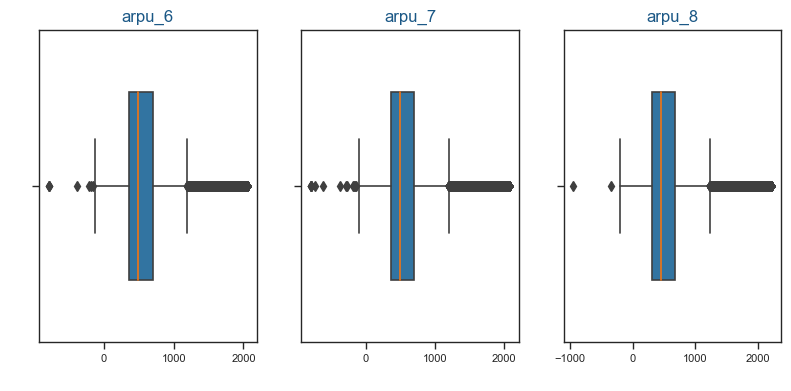

In [296]:
plot_all(data=churn_data_std, cols=arpu_cols, var_type='n', chart='boxplot', figsize=(8,4))

##### Analysis

*To analize, we look into the differences of customer's behavior from good phase to action phase in some aspects:*
* Arpu / Recharge amount
* Incomming call
* Outgoing call
* Using data
* Age on network

In [297]:
data_structure = examine_data(churn_data)
data_structure.sort_values(by='COLUMN_NAME', inplace=True)
data_structure

,COLUMN_NAME,NULL_COUNT,DTYPE,NULL_PERCENT,VARIABLE_TYPE,HANDLING_METHOD
120,aon,0,int64,0.0,numerical,NA
0,arpu_6,0,float64,0.0,numerical,NA
1,arpu_7,0,float64,0.0,numerical,NA
2,arpu_8,0,float64,0.0,numerical,NA
125,churn,0,int64,0.0,numerical,NA
121,gph_average_rech_amt,0,float64,0.0,numerical,NA
87,ic_others_6,0,float64,0.0,numerical,NA
88,ic_others_7,0,float64,0.0,numerical,NA
89,ic_others_8,0,float64,0.0,numerical,NA
84,isd_ic_mou_6,0,float64,0.0,numerical,NA


In [298]:
# Create new features:

# Difference in incomming call
churn_data_std['diff_ic_mou'] = churn_data_std['total_ic_mou_8'] - (churn_data_std['total_ic_mou_6'] + churn_data_std['total_ic_mou_7'])/2

# Difference in outgoing call
churn_data_std['diff_og_mou'] = churn_data_std['total_og_mou_8'] - (churn_data_std['total_og_mou_6'] + churn_data_std['total_og_mou_7'])/2
    
# Difference in Arpu 
churn_data_std['diff_arpu'] = churn_data_std['arpu_8'] - (churn_data_std['arpu_6'] + churn_data_std['arpu_7'])/2
    
# Difference in recharge amount 
churn_data_std['diff_rech_amt'] = churn_data_std['total_rech_amt_8'] - (churn_data_std['total_rech_amt_6'] + churn_data_std['total_rech_amt_7'])/2
    
# Difference in recharge num 
churn_data_std['diff_rech_num'] = churn_data_std['total_rech_num_8'] - (churn_data_std['total_rech_num_6'] + churn_data_std['total_rech_num_7'])/2

# Difference in recharge num 
churn_data_std['diff_vol_data'] = churn_data_std['vol_2g_mb_8'] + churn_data_std['vol_3g_mb_8']  - (churn_data_std['vol_2g_mb_6'] + churn_data_std['vol_2g_mb_7'] + churn_data_std['vol_3g_mb_6'] + churn_data_std['vol_3g_mb_7'] )/2


In [299]:
[x for x in data_structure.COLUMN_NAME if '2g' in x or '3g' in x ]

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'vbc_3g_6',
 'vbc_3g_7',
 'vbc_3g_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8']

* For easily analysizing, we will devide columns in some groups:

In [300]:
# Grouping columns
arpu_cols = [x for x in data_structure.COLUMN_NAME if 'arpu' in x ] + ['diff_arpu']
rech_amt_cols = [x for x in data_structure.COLUMN_NAME if 'total_rech_amt' in x ] + ['diff_rech_amt']
rech_num_cols = [x for x in data_structure.COLUMN_NAME if 'total_rech_num' in x ] + ['diff_rech_num']
ic_mou_cols = [x for x in data_structure.COLUMN_NAME if 'total_ic_mou' in x ] + ['diff_ic_mou']
og_mou_cols = [x for x in data_structure.COLUMN_NAME if 'total_og_mou' in x ] + ['diff_og_mou']
vol_cols = [x for x in data_structure.COLUMN_NAME if 'vol' in x ] + ['diff_vol_data']

aon_cols = ['aon']




### Distribution of data by target variable segments

##### Arpu features

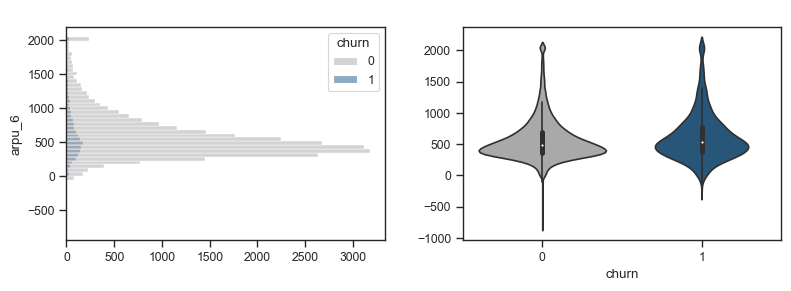

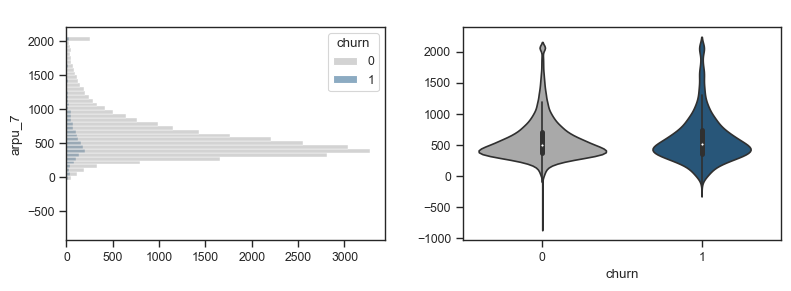

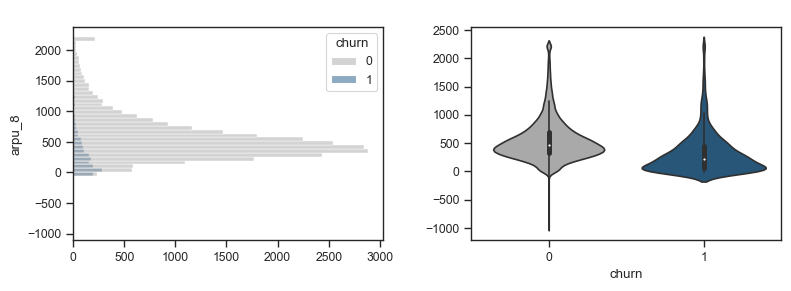

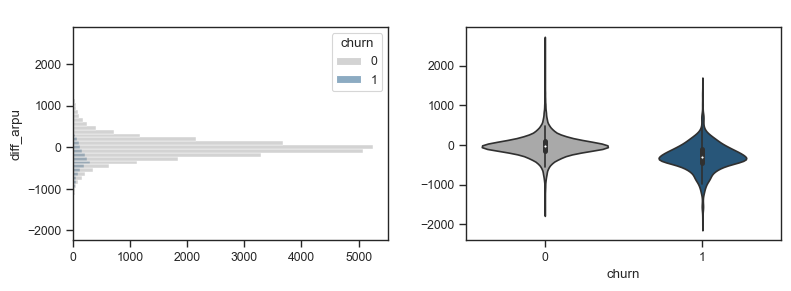

In [301]:
for col in arpu_cols:
    bi_plot(data=churn_data_std, col=col, target='churn', var_type='n', figsize=(8,3))

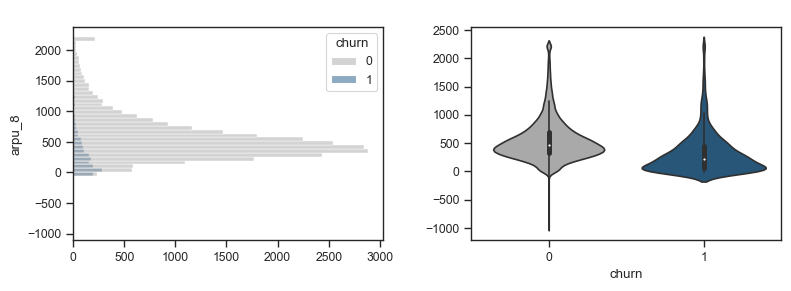

In [302]:
bi_plot(data=churn_data_std, col='arpu_8', target='churn', var_type='n', figsize=(8,3))

**Inference from charts:** 
* In good phase: arpu of churn and not churn are about the same. But in action phase arpu drop down significantly

##### Recharge amount, recharge number

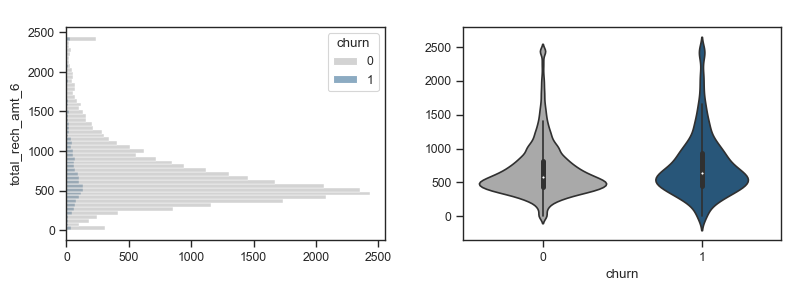

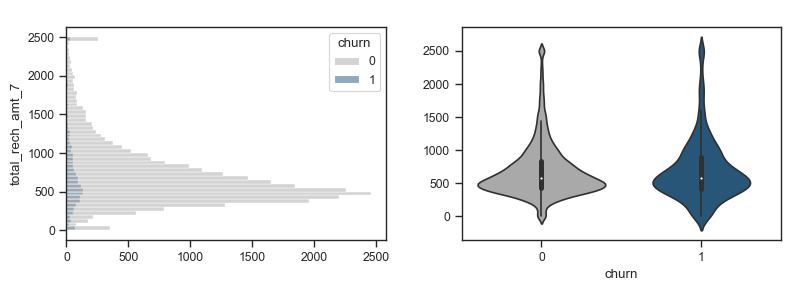

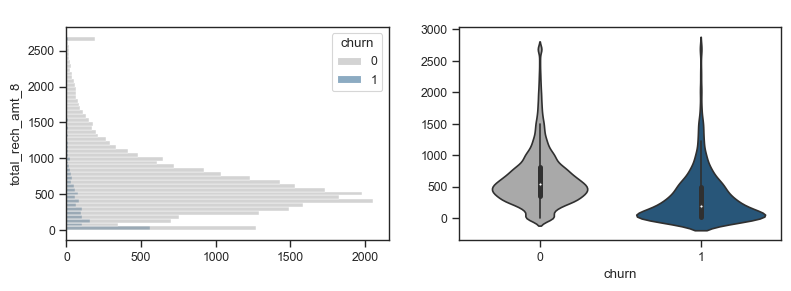

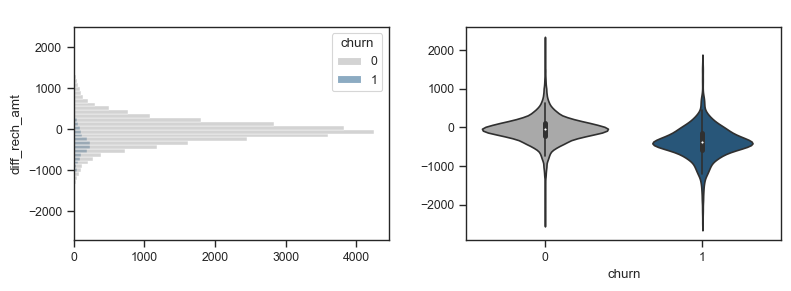

In [303]:
for col in rech_amt_cols:
    bi_plot(data=churn_data_std, col=col, target='churn', var_type='n', figsize=(8,3))

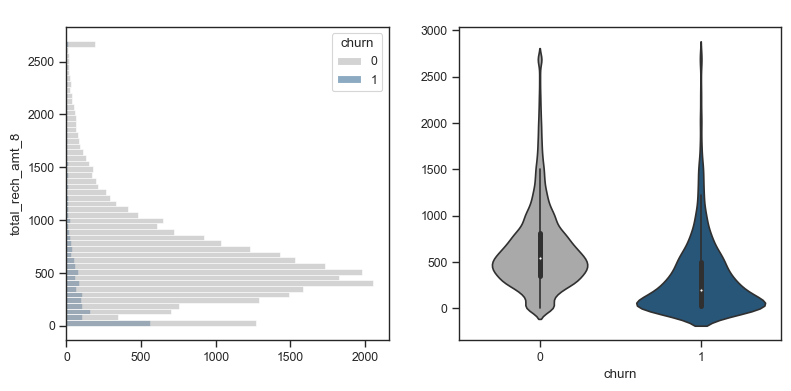

In [114]:
bi_plot(data=churn_data_std, col='total_rech_amt_8', target='churn', var_type='n', figsize=(8,4))

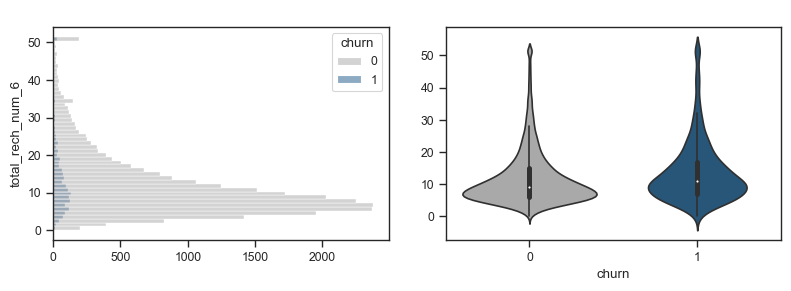

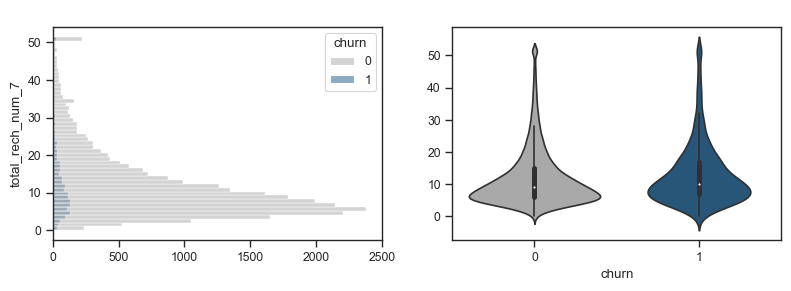

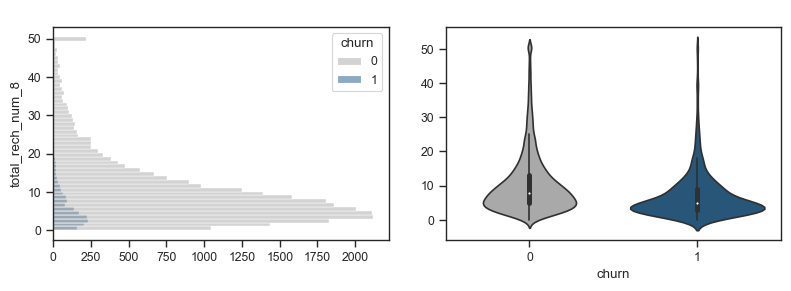

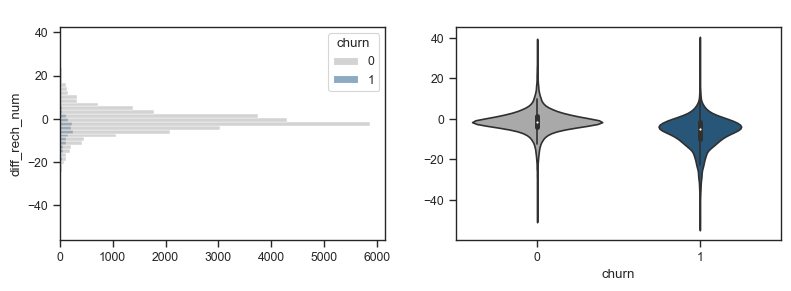

In [304]:
for col in rech_num_cols:
    bi_plot(data=churn_data_std, col=col, target='churn', var_type='n', figsize=(8,3))

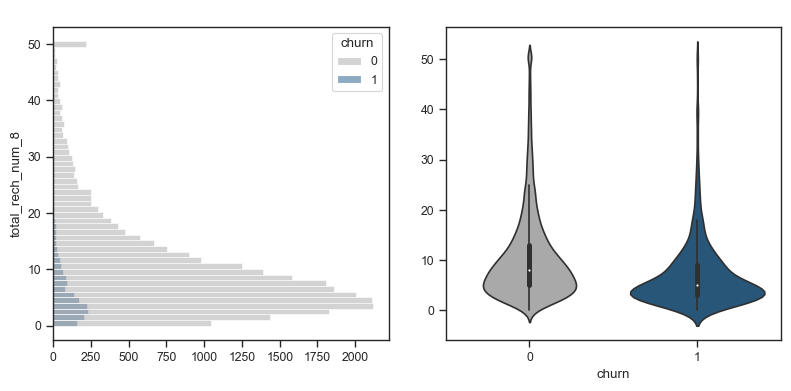

In [305]:
bi_plot(data=churn_data_std, col='total_rech_num_8', target='churn', var_type='n', figsize=(8,4))

**Inference from charts:** 
* In good phase: recharge amount/num of churn and not churn are about the same. But in action phase recharge amount/num of churn customers drop down in comparation with not churn customers
    

##### Incomming and outgoing call

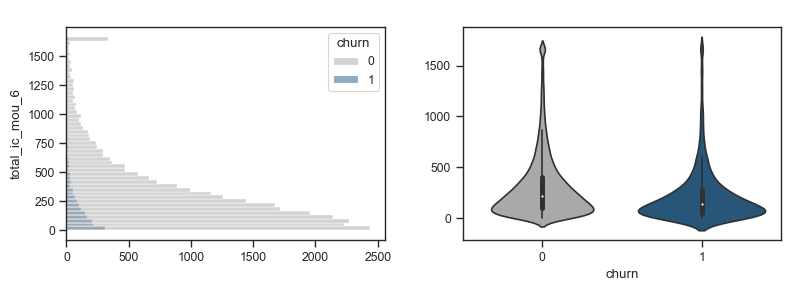

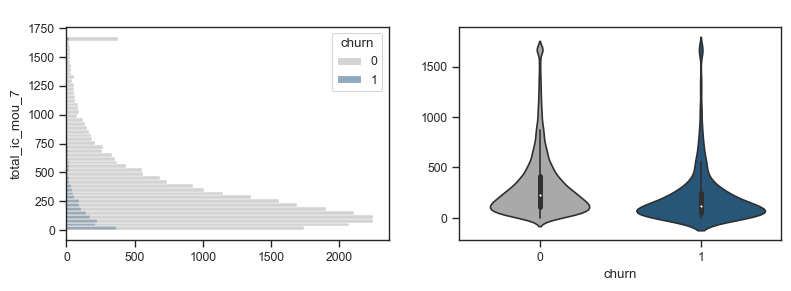

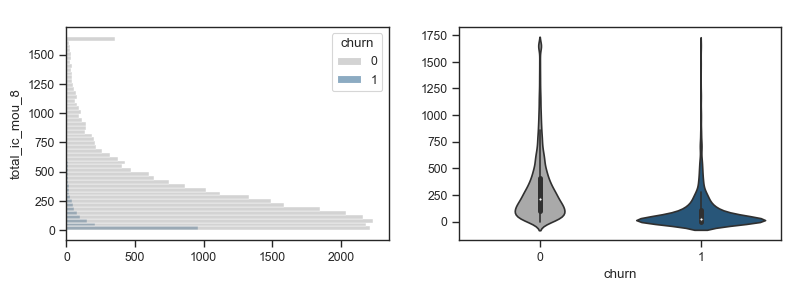

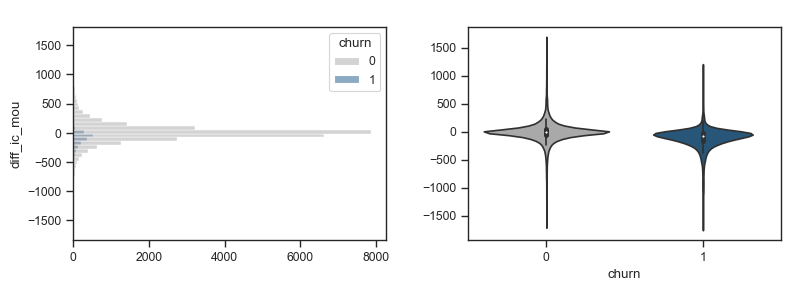

In [306]:
for col in ic_mou_cols:
    bi_plot(data=churn_data_std, col=col, target='churn', var_type='n', figsize=(8,3))

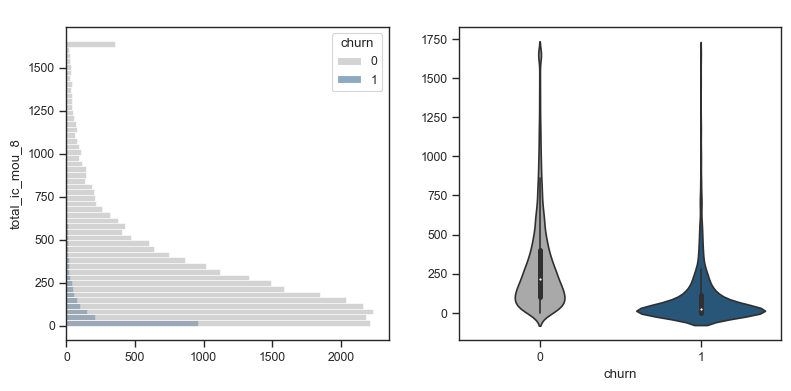

In [307]:
bi_plot(data=churn_data_std, col='total_ic_mou_8', target='churn', var_type='n', figsize=(8,4))

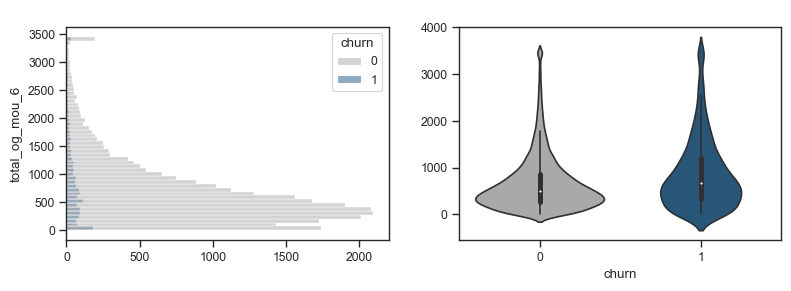

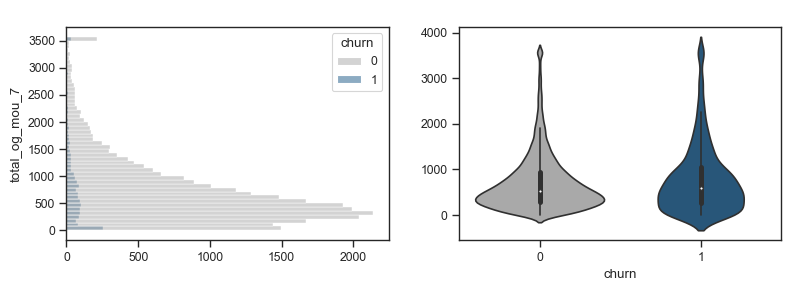

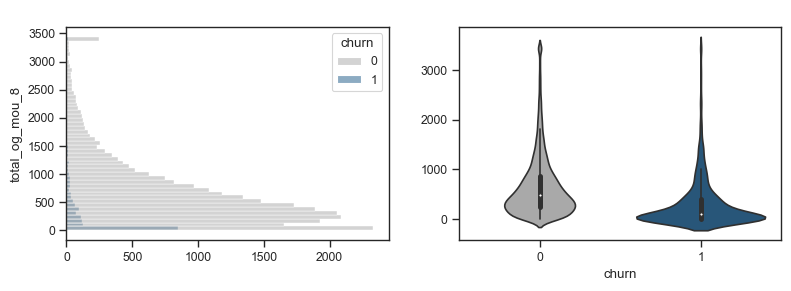

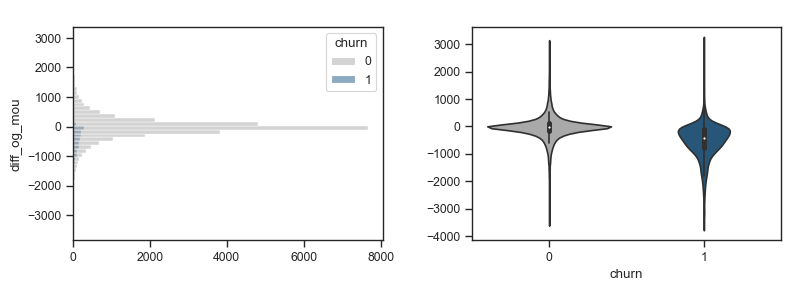

In [78]:
for col in og_mou_cols:
    bi_plot(data=churn_data_std, col=col, target='churn', var_type='n', figsize=(8,3))

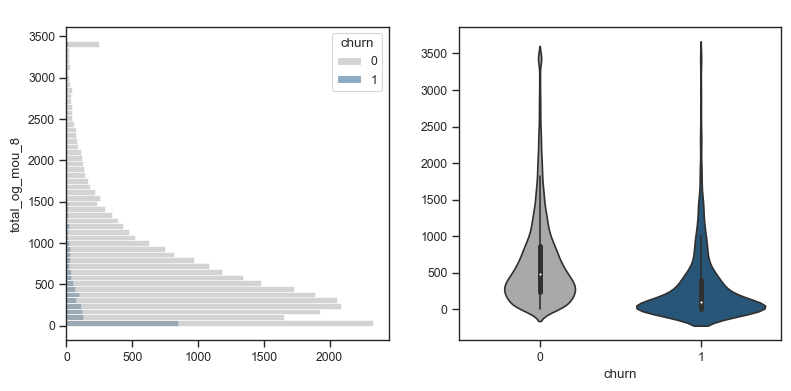

In [308]:
bi_plot(data=churn_data_std, col='total_og_mou_8', target='churn', var_type='n', figsize=(8,4))

**Inference from charts:** 
* In good phase: incomming call/outgoing call of churn and not churn are about the same. But in action phase Minutes of usage drop down significantly
* The MOU of incomming call of churn is relatively lower than that of not churn. But MOU of outgoing call in good phase of churn relatively higher than that of not churn

##### Age on network

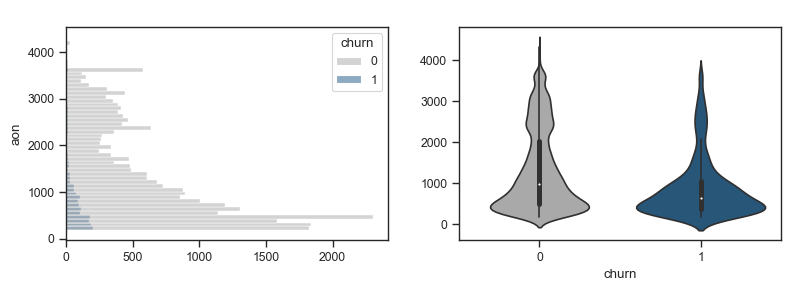

In [309]:
bi_plot(data=churn_data_std, col='aon', target='churn', var_type='n', figsize=(8,3))

**Inference from charts:** 
* Customers who have smaller AON are more likely to churn
    

##### Using data

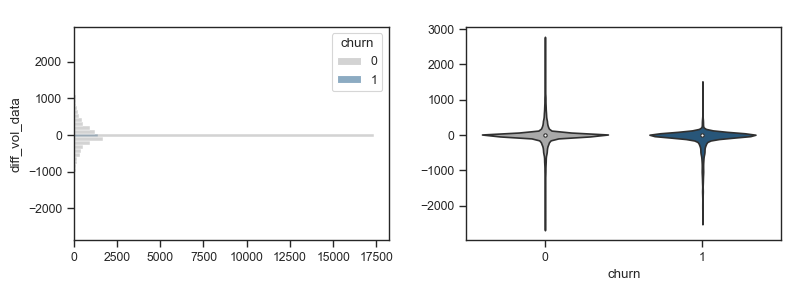

In [310]:
bi_plot(data=churn_data_std, col='diff_vol_data', target='churn', var_type='n', figsize=(8,3))

**Inference from charts:** 
* No clear difference in using data of churn and not churn customers
    

## 3 - DATA PREPARATION FOR MODEL BUILDING

In [311]:
# Reset the index 
churn_data_std.reset_index(inplace=True, drop=True)
churn_data_std.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,gph_average_rech_amt,vbc_3g_6,vbc_3g_7,vbc_3g_8,churn,diff_ic_mou,diff_og_mou,diff_arpu,diff_rech_amt,diff_rech_num,diff_vol_data
0,1069.180,1349.850,2218.2095,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.490,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,46.825,47.725,43.35,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,5.7,5.725,4.7,60.86,75.14,77.84,0.0,0.0,0.0,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,100.45,101.46,39.53,427.88,355.23,188.04,36.890,11.83,30.39,91.440,126.99,141.330,11.225,11.95,10.45,180.540,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.060,14.530,31.59,2.95,4.15,3.275,5.0,5.0,7.0,1580.0,790.0,2692.5,622.5,622.5,576.0,0.0,0.0,572.5,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802,1185.0,18.74,19.38,57.74,1,-163.510,-198.225,1008.6945,1507.5,2.0,0.000
1,378.721,492.223,137.3620,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.000,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.000,0.000,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.0,0.000,0.0,130.26,143.48,98.28,0.0,0.0,0.0,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.000,0.58,0.10,22.430,4.08,0.650,0.000,0.00,0.00,22.430,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.000,0.000,0.00,0.00,0.00,0.000,19.0,21.0,14.0,437.0,601.0,120.0,90.0,154.0,30.0,50.0,0.0,10.0,0.0,356.0,0.03,0.0,750.95,11.94,0.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,315,519.0,122.16,910.65,21.03,0,-49.635,-298.450,-298.1100,-399.0,-6.0,-541.505
2,492.846,205.671,593.2600,501.76,108.39,534.24,413.31,119.28,482.46,23.53,46.575,50.40,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.540,0.000,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.0,0.000,0.0,701.78,138.93,655.18,0.0,0.0,0.0,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,86.725,38.29,82.70,184.025,29.79,176.975,0.000,0.00,1.91,291.225,68.09,277.35,968.61,172.58,1144.53,0.45,0.0,0.0,36.725,45.775,40.65,2.95,4.15,3.275,6.0,4.0,11.0,507.0,253.0,717.0,110.0,110.0,130.0,110.0,50.

### 3.1 Splitting the Data into Train and Test sets.

In [312]:
from sklearn.model_selection import train_test_split

y = churn_data_std['churn']
X = churn_data_std.drop('churn', axis=1)

In [313]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 3.2 Handling Class Imbalance

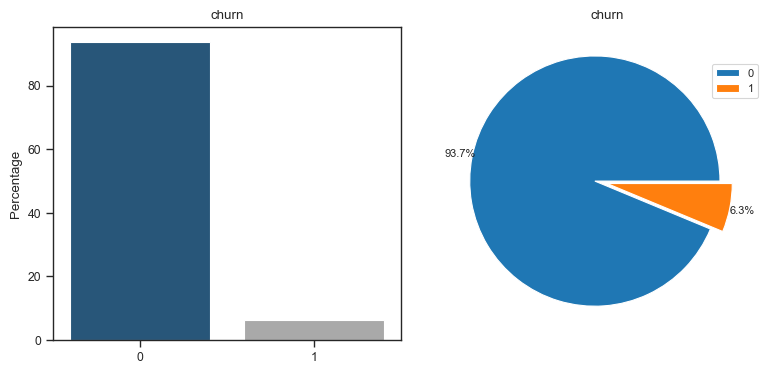

In [314]:
uni_plot(data=churn_data_std, col='churn', var_type='c',figsize=(8,4), face_highlight=True)


From the chart:
* The dataset is highly imbalanced => need to be handled before building model
* We will use SMOTE to take care of class imbalance

In [315]:
# Using SMOTE
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=42, k_neighbors=5)
X_train, y_train = smt.fit_resample(X_train, y_train)
len(X_train), len(y_train)

(37852, 37852)

<Axes: xlabel='churn', ylabel='Density'>

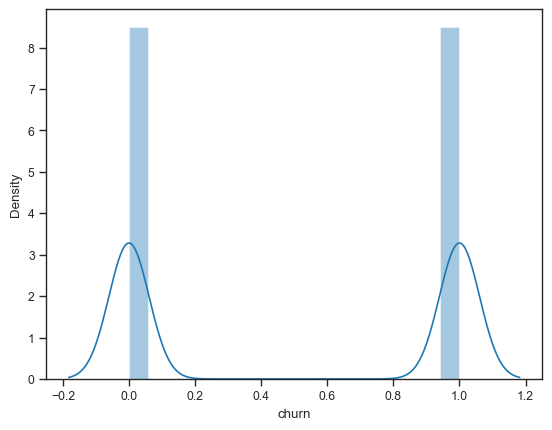

In [316]:
sns.distplot(y_train)

* The data is balanced now

### 3.3 Feature Scalling

In [317]:
from sklearn.preprocessing import StandardScaler

# Initiating Scaler
scaler = StandardScaler()

# data scaling
n_cols = X.columns #all columns is numerical
X_train[n_cols] = scaler.fit_transform(X_train[n_cols])
X_test[n_cols] = scaler.transform(X_test[n_cols])

In [318]:
X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,gph_average_rech_amt,vbc_3g_6,vbc_3g_7,vbc_3g_8,diff_ic_mou,diff_og_mou,diff_arpu,diff_rech_amt,diff_rech_num,diff_vol_data
count,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,37852.000000,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,37852.0,37852.0,37852.0,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,37852.0,37852.0,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,37852.0,37852.0,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,37852.0,37852.0,37852.0,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04,3.785200e+04
mean,-2.838266e-16,3.003457e-18,2.282627e-16,3.303802e-17,1.381590e-16,-1.802074e-17,-4.054666e-17,-9.761234e-18,9.010370e-17,-3.266259e-17,-4.805530e-17,-2.402765e-17,-5.706567e-17,7.808987e-17,8.409678e-17,-4.805530e-17,-4.204839e-17,-1.081244e-16,3.003457e-17,3.604148e-17,-2.402765e-17,-3.604148e-17,3.003457e-17,6.006913e-17,-1.372204e-16,-7.508641e-18,4.204839e-17,3.604148e-17,-1.081244e-16,0.000000,-1.201383e-17,3.003457e-17,8.409678e-17,3.003457e-17,7.208296e

## 4 - BUILDING MODEL AND MAKING PREDICTIONS

* In this problem, we should use **Recall** as evalation metric because the objective is to cover all the churn customers to take action
* To solve problem, we will check performance of Logistic Regression, Decision Tree, Random Forest on our dataset before choosing one for further turning.

### 4.1 Logistic Regression

In [319]:
##### Importing stats model
import statsmodels.api as sm

In [320]:
# Logistic Regression
#from collections import Counter
from sklearn.linear_model import LogisticRegression
# Metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


In [321]:
lreg = LogisticRegression(random_state=42)
lreg.fit(X_train, y_train)

y_pred = lreg.predict(X_test)

In [322]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.8152211571775032
F1 score:  0.3311036789297659
Recall:  0.7457627118644068
Precision:  0.21278882321332618

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      8128
           1       0.21      0.75      0.33       531

    accuracy                           0.82      8659
   macro avg       0.60      0.78      0.61      8659
weighted avg       0.93      0.82      0.86      8659


 confussion matrix:
 [[6663 1465]
 [ 135  396]]


### 4.2 Decision Tree

In [323]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

In [324]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc))
print ('F1 score: ', f1_score(y_test, y_pred_dtc))
print ('Recall: ', recall_score(y_test, y_pred_dtc))
print ('Precision: ', precision_score(y_test, y_pred_dtc))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc))

Accuracy:  0.8808176463794896
F1 score:  0.31291611185086554
Recall:  0.4425612052730697
Precision:  0.2420185375901133

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      8128
           1       0.24      0.44      0.31       531

    accuracy                           0.88      8659
   macro avg       0.60      0.68      0.62      8659
weighted avg       0.92      0.88      0.90      8659


 confussion matrix:
 [[7392  736]
 [ 296  235]]


### 4.3 Random Forest

In [325]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1,random_state=42)
rf.fit(X_train, y_train)

y_pred_rf= rf.predict(X_test)

In [326]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9342880240212496
F1 score:  0.4775022956841139
Recall:  0.4896421845574388
Precision:  0.4659498207885305

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      8128
           1       0.47      0.49      0.48       531

    accuracy                           0.93      8659
   macro avg       0.72      0.73      0.72      8659
weighted avg       0.94      0.93      0.94      8659


 confussion matrix:
 [[7830  298]
 [ 271  260]]


### Conclusion:
* As we can see, Logistic Regression with Recall ~ 0.75, is the best model to choose

### 4.4 Turning the Logistic Regression Model

#### Feature Selection
* We will use Recursive Feature Elimination with Cross Validation (RFECV) to find optimal number of features for our model.

In [327]:
# Import RFE
from sklearn.feature_selection import RFECV
logreg = LogisticRegression(random_state=42)

rfecv = RFECV(estimator=logreg, cv=4, scoring='recall')


In [328]:
%%time
rfecv.fit(X_train, y_train)

CPU times: total: 11min 25s
Wall time: 3min 41s


RFECV(cv=4, estimator=LogisticRegression(random_state=42), scoring='recall')

In [329]:
rfecv.cv_results_

{'mean_test_score': array([0.83371841, 0.8439701 , 0.8378926 , 0.83435236, 0.83477464,
        0.82901627, 0.82959852, 0.83604451, 0.82833124, 0.83155434,
        0.83049757, 0.83197708, 0.8317128 , 0.829071  , 0.83002186,
        0.83335042, 0.83181819, 0.83171237, 0.83234639, 0.83250497,
        0.83514666, 0.83763002, 0.83873965, 0.83763015, 0.83826424,
        0.83831703, 0.83847557, 0.83847547, 0.83863401, 0.83889825,
        0.83842274, 0.83958526, 0.83953242, 0.84027209, 0.84080057,
        0.84191027, 0.84138186, 0.84286112, 0.84280827, 0.84280829,
        0.84217421, 0.84201572, 0.843601  , 0.84365377, 0.84455203,
        0.84534453, 0.84529171, 0.84592589, 0.84534481, 0.84560892,
        0.84550329, 0.84582034, 0.84582026, 0.84582027, 0.84640146,
        0.84724685, 0.846877  , 0.84756378, 0.84671838, 0.84708835,
        0.84809218, 0.84851496, 0.84835642, 0.84782805, 0.8487791 ,
        0.84867353, 0.8493604 , 0.84893766, 0.8484093 , 0.84825069,
        0.84814502, 0.8488318

In [330]:
list(zip(X_train.columns, rfecv.support_, rfecv.ranking_))

[('arpu_6', False, 35),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('onnet_mou_6', True, 1),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', True, 1),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 37),
 ('roam_ic_mou_7', True, 1),
 ('roam_ic_mou_8', True, 1),
 ('roam_og_mou_6', False, 12),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 31),
 ('loc_og_t2t_mou_7', False, 32),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2m_mou_7', True, 1),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 30),
 ('loc_og_t2f_mou_7', False, 27),
 ('loc_og_t2f_mou_8', False, 38),
 ('loc_og_t2c_mou_6', False, 34),
 ('loc_og_t2c_mou_7', False, 52),
 ('loc_og_t2c_mou_8', True, 1),
 ('loc_og_mou_6', False, 11),
 ('loc_og_mou_7', False, 21),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', True, 1),
 ('std_og_t2t_mou_7', True, 1),
 ('std_og_t2t_mou_8', True, 1),
 ('std_

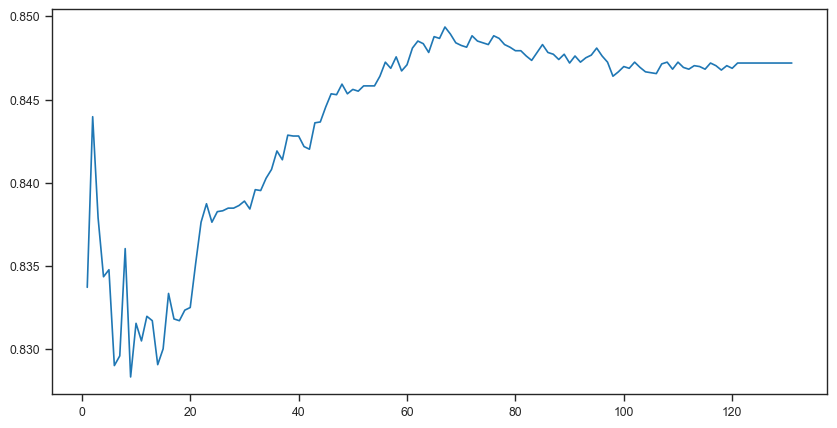

In [331]:
plt.figure(figsize=[10, 5])
plt.plot(range(1, X_train.shape[1]+1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [332]:
#rfecv.n_features_
rfecv.n_features_

67

* We have best score with num of features = 67.

In [333]:
df = pd.DataFrame({'Feature': X_train.columns[rfecv.support_],
                  'Coef': rfecv.estimator_.coef_.reshape(-1)})
df['abs_coef'] = np.abs(df['Coef'])
df = df.sort_values(by = 'abs_coef', ascending=False)
df.head(25)

,Feature,Coef,abs_coef
26,std_og_mou_8,1.021772,1.021772
1,arpu_8,0.849949,0.849949
35,loc_ic_t2m_mou_8,-0.832639,0.832639
0,arpu_7,0.786115,0.786115
61,gph_average_rech_amt,-0.725625,0.725625
7,offnet_mou_8,-0.713401,0.713401
6,offnet_mou_7,0.654858,0.654858
3,onnet_mou_7,0.623799,0.623799
20,std_og_t2t_mou_8,-0.536342,0.536342
33,loc_ic_t2m_mou_6,0.520325,0.520325


##### Performance on test set

In [334]:
y_pred_rfecv = rfecv.predict(X_test)

In [335]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rfecv))
print ('F1 score: ', f1_score(y_test, y_pred_rfecv))
print ('Recall: ', recall_score(y_test, y_pred_rfecv))
print ('Precision: ', precision_score(y_test, y_pred_rfecv))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rfecv))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rfecv))

Accuracy:  0.816722485275436
F1 score:  0.3362609786700125
Recall:  0.7570621468926554
Precision:  0.2161290322580645

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.89      8128
           1       0.22      0.76      0.34       531

    accuracy                           0.82      8659
   macro avg       0.60      0.79      0.61      8659
weighted avg       0.93      0.82      0.86      8659


 confussion matrix:
 [[6670 1458]
 [ 129  402]]


#### Assessing the model with StatsModels
##### Feature Selection Using RFE

In [336]:
# Import RFE
from sklearn.feature_selection import RFE
logreg = LogisticRegression(random_state=42, n_jobs=-1)

# Running RFE with 20 features selected
rfe = RFE(logreg, n_features_to_select = 20)
rfe = rfe.fit(X_train, y_train)

In [337]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['arpu_7', 'arpu_8', 'onnet_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_mou_7', 'total_og_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'total_rech_amt_7',
       'last_day_rch_amt_8', 'monthly_2g_8', 'monthly_3g_8',
       'gph_average_rech_amt', 'diff_rech_amt', 'diff_rech_num'],
      dtype='object')


##### Model 1

In [338]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37852
Model:                            GLM   Df Residuals:                    37831
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16280.
Date:                Wed, 14 Feb 2024   Deviance:                       32559.
Time:                        00:12:55   Pearson chi2:                 6.42e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4091
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1655      0.016    -10.591      0.000      -0.196      -0.135
arpu_7                   0.6320      0.050     12.518      0.000       0.533       0.731
arpu_8                   0.6787      0.063     10.768      0.000       0.555       0.802
onnet_mou_7              0.5964      0.069      8.644      0.000       0.461       0.732
roam_og_mou_8            0.5458      0.017     32.761      0.000       0.513       0.578
loc_og_t2t_mou_8        -0.5133      0.031    -16.459      0.000      -0.574      -0.452
loc_og_t2m_mou_8        -0.4098      0.037    -11.134      0.000      -0.482      -0.338
std_og_t2t_mou_7        -0.5842      0.071     -8.203      0.000      -0.724      -0.445
std_og_t2t_mou_8        -0.3830      0.027    -14.298      0.000      -0.436      -0.331
std_og_t2m_mou_8        -0.4013      0.026    -15.502      0.000      -0.452      -0.351
std_og_mou_7             0.7814      0.082      9.571      0.000       0.621       0.941
total_og_mou_7          -0.3488      0.077     -4.534      0.000      -0.500      -0.198
loc_ic_t2m_mou_7         0.5898      0.033     17.972      0.000       0.526       0.654
loc_ic_t2m_mou_8        -1.0239      0.043    -23.743      0.000      -1.108      -0.939
total_rech_amt_7        -0.3598      0.046     -7.745      0.000      -0.451      -0.269
last_day_rch_amt_8      -0.4234      0.020    -21.657      0.000      -0.462      -0.385
monthly_2g_8            -0.4267      0.020    -20.869      0.000      -0.467      -0.387
monthly_3g_8            -0.3378      0.020    -16.853      0.000      -0.377      -0.298
gph_average_rech_amt    -0.6769      0.057    -11.811      0.000      -0.789      -0.565
diff_rech_amt           -0.7817      0.054    -14.440      0.000      -0.888      -0.676
diff_rech_num           -0.3875      0.022    -17.829      0.000      -0.430      -0.345
========================================================================================
"""

**Checking VIF**

In [339]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def vif(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [340]:
vif(X_train[cols])

,Features,VIF
9,std_og_mou_7,23.20
10,total_og_mou_7,21.30
6,std_og_t2t_mou_7,19.60
2,onnet_mou_7,18.05
1,arpu_8,14.73
17,gph_average_rech_amt,13.19
0,arpu_7,10.70
18,diff_rech_amt,10.64
13,total_rech_amt_7,9.56
12,loc_ic_t2m_mou_8,4.39


* We drop *std_og_mou_7* because of high VIF

In [341]:
cols = cols.drop('std_og_mou_7')
cols

Index(['arpu_7', 'arpu_8', 'onnet_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_og_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'total_rech_amt_7', 'last_day_rch_amt_8',
       'monthly_2g_8', 'monthly_3g_8', 'gph_average_rech_amt', 'diff_rech_amt',
       'diff_rech_num'],
      dtype='object')

##### Model 2

In [342]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37852
Model:                            GLM   Df Residuals:                    37832
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16327.
Date:                Wed, 14 Feb 2024   Deviance:                       32653.
Time:                        00:13:22   Pearson chi2:                 6.70e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4076
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1829      0.016    -11.756      0.000      -0.213      -0.152
arpu_7                   0.6258      0.050     12.448      0.000       0.527       0.724
arpu_8                   0.6648      0.063     10.553      0.000       0.541       0.788
onnet_mou_7              0.2547      0.056      4.528      0.000       0.144       0.365
roam_og_mou_8            0.5669      0.017     34.274      0.000       0.534       0.599
loc_og_t2t_mou_8        -0.5522      0.031    -17.733      0.000      -0.613      -0.491
loc_og_t2m_mou_8        -0.5958      0.032    -18.657      0.000      -0.658      -0.533
std_og_t2t_mou_7        -0.1743      0.055     -3.184      0.001      -0.282      -0.067
std_og_t2t_mou_8        -0.3649      0.027    -13.738      0.000      -0.417      -0.313
std_og_t2m_mou_8        -0.3143      0.024    -13.267      0.000      -0.361      -0.268
total_og_mou_7           0.2978      0.035      8.494      0.000       0.229       0.367
loc_ic_t2m_mou_7         0.4893      0.031     15.807      0.000       0.429       0.550
loc_ic_t2m_mou_8        -0.9324      0.042    -22.364      0.000      -1.014      -0.851
total_rech_amt_7        -0.3476      0.046     -7.511      0.000      -0.438      -0.257
last_day_rch_amt_8      -0.4231      0.019    -21.742      0.000      -0.461      -0.385
monthly_2g_8            -0.4246      0.020    -20.804      0.000      -0.465      -0.385
monthly_3g_8            -0.3388      0.020    -16.900      0.000      -0.378      -0.300
gph_average_rech_amt    -0.6702      0.057    -11.706      0.000      -0.782      -0.558
diff_rech_amt           -0.7809      0.054    -14.399      0.000      -0.887      -0.675
diff_rech_num           -0.3844      0.022    -17.704      0.000      -0.427      -0.342
========================================================================================
"""

In [343]:
#Checking VIF
vif(X_train[cols])

,Features,VIF
1,arpu_8,14.71
16,gph_average_rech_amt,13.18
2,onnet_mou_7,12.61
6,std_og_t2t_mou_7,12.23
0,arpu_7,10.69
17,diff_rech_amt,10.64
12,total_rech_amt_7,9.54
9,total_og_mou_7,4.65
11,loc_ic_t2m_mou_8,4.12
10,loc_ic_t2m_mou_7,3.26


* We drop *gph_average_rech_amt* because of it's high VIF

In [344]:
cols = cols.drop('gph_average_rech_amt')
cols

Index(['arpu_7', 'arpu_8', 'onnet_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_og_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'total_rech_amt_7', 'last_day_rch_amt_8',
       'monthly_2g_8', 'monthly_3g_8', 'diff_rech_amt', 'diff_rech_num'],
      dtype='object')

##### Model 3

In [345]:
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37852
Model:                            GLM   Df Residuals:                    37833
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16397.
Date:                Wed, 14 Feb 2024   Deviance:                       32793.
Time:                        00:13:51   Pearson chi2:                 6.66e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4054
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1708      0.015    -11.059      0.000      -0.201      -0.141
arpu_7                 0.4000      0.046      8.770      0.000       0.311       0.489
arpu_8                 0.0955      0.039      2.446      0.014       0.019       0.172
onnet_mou_7            0.2094      0.056      3.745      0.000       0.100       0.319
roam_og_mou_8          0.5460      0.016     33.456      0.000       0.514       0.578
loc_og_t2t_mou_8      -0.5399      0.031    -17.533      0.000      -0.600      -0.480
loc_og_t2m_mou_8      -0.5920      0.032    -18.720      0.000      -0.654      -0.530
std_og_t2t_mou_7      -0.1295      0.054     -2.379      0.017      -0.236      -0.023
std_og_t2t_mou_8      -0.3817      0.026    -14.408      0.000      -0.434      -0.330
std_og_t2m_mou_8      -0.3300      0.024    -13.984      0.000      -0.376      -0.284
total_og_mou_7         0.3013      0.035      8.622      0.000       0.233       0.370
loc_ic_t2m_mou_7       0.4996      0.031     16.199      0.000       0.439       0.560
loc_ic_t2m_mou_8      -0.9415      0.042    -22.679      0.000      -1.023      -0.860
total_rech_amt_7      -0.2631      0.045     -5.826      0.000      -0.352      -0.175
last_day_rch_amt_8    -0.4573      0.019    -23.818      0.000      -0.495      -0.420
monthly_2g_8          -0.4242      0.020    -20.871      0.000      -0.464      -0.384
monthly_3g_8          -0.3376      0.020    -16.916      0.000      -0.377      -0.299
diff_rech_amt         -0.2630      0.030     -8.686      0.000      -0.322      -0.204
diff_rech_num         -0.3447      0.021    -16.196      0.000      -0.386      -0.303
======================================================================================
"""

In [346]:
# checking VIF
vif(X_train[cols])

,Features,VIF
2,onnet_mou_7,12.57
6,std_og_t2t_mou_7,12.20
12,total_rech_amt_7,9.39
0,arpu_7,8.89
1,arpu_8,6.81
9,total_og_mou_7,4.65
11,loc_ic_t2m_mou_8,4.12
16,diff_rech_amt,3.94
10,loc_ic_t2m_mou_7,3.26
7,std_og_t2t_mou_8,2.90


* We drop *onnet_mou_7* because of it's high p-value

In [347]:
cols = cols.drop('onnet_mou_7')
cols

Index(['arpu_7', 'arpu_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'total_og_mou_7', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'total_rech_amt_7', 'last_day_rch_amt_8',
       'monthly_2g_8', 'monthly_3g_8', 'diff_rech_amt', 'diff_rech_num'],
      dtype='object')

##### Model 4

In [348]:
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37852
Model:                            GLM   Df Residuals:                    37834
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16404.
Date:                Wed, 14 Feb 2024   Deviance:                       32807.
Time:                        00:14:24   Pearson chi2:                 6.59e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4052
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1665      0.015    -10.818      0.000      -0.197      -0.136
arpu_7                 0.4108      0.045      9.034      0.000       0.322       0.500
arpu_8                 0.0999      0.039      2.562      0.010       0.023       0.176
roam_og_mou_8          0.5532      0.016     34.138      0.000       0.521       0.585
loc_og_t2t_mou_8      -0.4660      0.023    -20.232      0.000      -0.511      -0.421
loc_og_t2m_mou_8      -0.6148      0.031    -19.724      0.000      -0.676      -0.554
std_og_t2t_mou_7       0.0375      0.031      1.191      0.233      -0.024       0.099
std_og_t2t_mou_8      -0.3763      0.026    -14.260      0.000      -0.428      -0.325
std_og_t2m_mou_8      -0.3534      0.023    -15.401      0.000      -0.398      -0.308
total_og_mou_7         0.3303      0.034      9.592      0.000       0.263       0.398
loc_ic_t2m_mou_7       0.4920      0.031     16.022      0.000       0.432       0.552
loc_ic_t2m_mou_8      -0.9364      0.041    -22.602      0.000      -1.018      -0.855
total_rech_amt_7      -0.2634      0.045     -5.839      0.000      -0.352      -0.175
last_day_rch_amt_8    -0.4536      0.019    -23.736      0.000      -0.491      -0.416
monthly_2g_8          -0.4260      0.020    -20.964      0.000      -0.466      -0.386
monthly_3g_8          -0.3419      0.020    -17.157      0.000      -0.381      -0.303
diff_rech_amt         -0.2680      0.030     -8.854      0.000      -0.327      -0.209
diff_rech_num         -0.3462      0.021    -16.237      0.000      -0.388      -0.304
======================================================================================
"""

In [349]:
# Checking VIF
vif(X_train[cols])

,Features,VIF
11,total_rech_amt_7,9.39
0,arpu_7,8.86
1,arpu_8,6.80
8,total_og_mou_7,4.43
10,loc_ic_t2m_mou_8,4.12
15,diff_rech_amt,3.93
5,std_og_t2t_mou_7,3.44
9,loc_ic_t2m_mou_7,3.25
6,std_og_t2t_mou_8,2.90
4,loc_og_t2m_mou_8,2.45


* We drop *std_og_t2t_mou_7* because of it's high p-value

In [350]:
cols = cols.drop('std_og_t2t_mou_7')
cols

Index(['arpu_7', 'arpu_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'total_og_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'total_rech_amt_7', 'last_day_rch_amt_8', 'monthly_2g_8',
       'monthly_3g_8', 'diff_rech_amt', 'diff_rech_num'],
      dtype='object')

##### Model 5

In [351]:
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37852
Model:                            GLM   Df Residuals:                    37835
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16404.
Date:                Wed, 14 Feb 2024   Deviance:                       32809.
Time:                        00:14:56   Pearson chi2:                 6.60e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4052
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1676      0.015    -10.910      0.000      -0.198      -0.138
arpu_7                 0.4103      0.045      9.019      0.000       0.321       0.499
arpu_8                 0.0967      0.039      2.485      0.013       0.020       0.173
roam_og_mou_8          0.5544      0.016     34.279      0.000       0.523       0.586
loc_og_t2t_mou_8      -0.4719      0.023    -20.938      0.000      -0.516      -0.428
loc_og_t2m_mou_8      -0.6202      0.031    -20.096      0.000      -0.681      -0.560
std_og_t2t_mou_8      -0.3565      0.020    -17.470      0.000      -0.396      -0.317
std_og_t2m_mou_8      -0.3641      0.021    -17.209      0.000      -0.406      -0.323
total_og_mou_7         0.3522      0.029     12.068      0.000       0.295       0.409
loc_ic_t2m_mou_7       0.4884      0.031     15.975      0.000       0.428       0.548
loc_ic_t2m_mou_8      -0.9336      0.041    -22.564      0.000      -1.015      -0.852
total_rech_amt_7      -0.2632      0.045     -5.832      0.000      -0.352      -0.175
last_day_rch_amt_8    -0.4537      0.019    -23.738      0.000      -0.491      -0.416
monthly_2g_8          -0.4262      0.020    -20.970      0.000      -0.466      -0.386
monthly_3g_8          -0.3417      0.020    -17.143      0.000      -0.381      -0.303
diff_rech_amt         -0.2668      0.030     -8.815      0.000      -0.326      -0.207
diff_rech_num         -0.3464      0.021    -16.244      0.000      -0.388      -0.305
======================================================================================
"""

In [352]:
# checking VIF
vif(X_train[cols])

,Features,VIF
10,total_rech_amt_7,9.39
0,arpu_7,8.86
1,arpu_8,6.78
9,loc_ic_t2m_mou_8,4.09
14,diff_rech_amt,3.93
7,total_og_mou_7,3.35
8,loc_ic_t2m_mou_7,3.21
4,loc_og_t2m_mou_8,2.41
6,std_og_t2m_mou_8,1.99
5,std_og_t2t_mou_8,1.95


* We drop *total_rech_amt_7* because of it's high VIF

In [353]:
cols = cols.drop('total_rech_amt_7')
cols

Index(['arpu_7', 'arpu_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'total_og_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'monthly_3g_8', 'diff_rech_amt',
       'diff_rech_num'],
      dtype='object')

##### Model 6

In [354]:
X_train_sm = sm.add_constant(X_train[cols])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37852
Model:                            GLM   Df Residuals:                    37836
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16422.
Date:                Wed, 14 Feb 2024   Deviance:                       32843.
Time:                        00:15:21   Pearson chi2:                 6.71e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4047
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1679      0.015    -10.926      0.000      -0.198      -0.138
arpu_7                 0.2149      0.030      7.144      0.000       0.156       0.274
arpu_8                 0.0323      0.037      0.869      0.385      -0.041       0.105
roam_og_mou_8          0.5499      0.016     34.047      0.000       0.518       0.582
loc_og_t2t_mou_8      -0.4751      0.023    -21.040      0.000      -0.519      -0.431
loc_og_t2m_mou_8      -0.6193      0.031    -20.053      0.000      -0.680      -0.559
std_og_t2t_mou_8      -0.3583      0.020    -17.555      0.000      -0.398      -0.318
std_og_t2m_mou_8      -0.3668      0.021    -17.317      0.000      -0.408      -0.325
total_og_mou_7         0.3441      0.029     11.797      0.000       0.287       0.401
loc_ic_t2m_mou_7       0.4908      0.031     16.040      0.000       0.431       0.551
loc_ic_t2m_mou_8      -0.9381      0.041    -22.641      0.000      -1.019      -0.857
last_day_rch_amt_8    -0.4502      0.019    -23.565      0.000      -0.488      -0.413
monthly_2g_8          -0.4284      0.020    -21.073      0.000      -0.468      -0.389
monthly_3g_8          -0.3451      0.020    -17.276      0.000      -0.384      -0.306
diff_rech_amt         -0.2084      0.028     -7.316      0.000      -0.264      -0.153
diff_rech_num         -0.3518      0.021    -16.507      0.000      -0.394      -0.310
======================================================================================
"""

In [355]:
# checking VIF
vif(X_train[cols])

,Features,VIF
1,arpu_8,6.10
0,arpu_7,4.17
9,loc_ic_t2m_mou_8,4.09
13,diff_rech_amt,3.40
7,total_og_mou_7,3.33
8,loc_ic_t2m_mou_7,3.21
4,loc_og_t2m_mou_8,2.41
6,std_og_t2m_mou_8,1.99
5,std_og_t2t_mou_8,1.95
14,diff_rech_num,1.92


* We drop *arpu_7* because of it high VIF and p-value

In [356]:
cols = cols.drop('arpu_7')
cols

Index(['arpu_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'total_og_mou_7',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'monthly_3g_8', 'diff_rech_amt', 'diff_rech_num'],
      dtype='object')

##### Model 7

In [357]:
X_train_sm = sm.add_constant(X_train[cols])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37852
Model:                            GLM   Df Residuals:                    37837
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16447.
Date:                Wed, 14 Feb 2024   Deviance:                       32895.
Time:                        00:15:42   Pearson chi2:                 6.91e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4038
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1656      0.015    -10.805      0.000      -0.196      -0.136
arpu_8                 0.2212      0.026      8.460      0.000       0.170       0.272
roam_og_mou_8          0.5456      0.016     33.855      0.000       0.514       0.577
loc_og_t2t_mou_8      -0.4948      0.022    -22.085      0.000      -0.539      -0.451
loc_og_t2m_mou_8      -0.6373      0.031    -20.765      0.000      -0.697      -0.577
std_og_t2t_mou_8      -0.3940      0.020    -19.954      0.000      -0.433      -0.355
std_og_t2m_mou_8      -0.3976      0.021    -19.215      0.000      -0.438      -0.357
total_og_mou_7         0.4414      0.026     17.200      0.000       0.391       0.492
loc_ic_t2m_mou_7       0.5048      0.030     16.559      0.000       0.445       0.565
loc_ic_t2m_mou_8      -0.9469      0.041    -22.898      0.000      -1.028      -0.866
last_day_rch_amt_8    -0.4342      0.019    -22.967      0.000      -0.471      -0.397
monthly_2g_8          -0.4218      0.020    -20.860      0.000      -0.461      -0.382
monthly_3g_8          -0.3352      0.020    -16.958      0.000      -0.374      -0.296
diff_rech_amt         -0.3043      0.025    -12.121      0.000      -0.354      -0.255
diff_rech_num         -0.3547      0.021    -16.652      0.000      -0.396      -0.313
======================================================================================
"""

In [358]:
# checking VIF
vif(X_train[cols])

,Features,VIF
8,loc_ic_t2m_mou_8,4.09
7,loc_ic_t2m_mou_7,3.19
0,arpu_8,3.15
12,diff_rech_amt,2.65
6,total_og_mou_7,2.46
3,loc_og_t2m_mou_8,2.38
5,std_og_t2m_mou_8,1.92
13,diff_rech_num,1.92
4,std_og_t2t_mou_8,1.85
2,loc_og_t2t_mou_8,1.43


* We drop *loc_ic_t2m_mou_7*  

In [359]:
cols = cols.drop('loc_ic_t2m_mou_7')

##### Model 8

In [360]:
X_train_sm = sm.add_constant(X_train[cols])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37852
Model:                            GLM   Df Residuals:                    37838
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16597.
Date:                Wed, 14 Feb 2024   Deviance:                       33194.
Time:                        00:16:16   Pearson chi2:                 6.23e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3991
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1354      0.015     -9.038      0.000      -0.165      -0.106
arpu_8                 0.2197      0.026      8.411      0.000       0.169       0.271
roam_og_mou_8          0.5456      0.016     33.986      0.000       0.514       0.577
loc_og_t2t_mou_8      -0.5207      0.022    -23.480      0.000      -0.564      -0.477
loc_og_t2m_mou_8      -0.6124      0.030    -20.592      0.000      -0.671      -0.554
std_og_t2t_mou_8      -0.4529      0.020    -23.135      0.000      -0.491      -0.415
std_og_t2m_mou_8      -0.4517      0.021    -21.948      0.000      -0.492      -0.411
total_og_mou_7         0.5212      0.025     20.527      0.000       0.471       0.571
loc_ic_t2m_mou_8      -0.4614      0.027    -17.243      0.000      -0.514      -0.409
last_day_rch_amt_8    -0.4358      0.019    -23.198      0.000      -0.473      -0.399
monthly_2g_8          -0.4187      0.020    -20.956      0.000      -0.458      -0.380
monthly_3g_8          -0.3345      0.020    -17.097      0.000      -0.373      -0.296
diff_rech_amt         -0.3071      0.025    -12.204      0.000      -0.356      -0.258
diff_rech_num         -0.3758      0.021    -17.607      0.000      -0.418      -0.334
======================================================================================
"""

In [361]:
# Check VIF
vif(X_train[cols])

,Features,VIF
0,arpu_8,3.15
11,diff_rech_amt,2.65
6,total_og_mou_7,2.42
3,loc_og_t2m_mou_8,2.38
7,loc_ic_t2m_mou_8,1.92
12,diff_rech_num,1.92
5,std_og_t2m_mou_8,1.90
4,std_og_t2t_mou_8,1.82
2,loc_og_t2t_mou_8,1.43
8,last_day_rch_amt_8,1.36


In [362]:
# We remove total_og_mou_7 because of it's highest VIF and to make model more simple
cols = cols.drop('total_og_mou_7')
cols

Index(['arpu_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8',
       'last_day_rch_amt_8', 'monthly_2g_8', 'monthly_3g_8', 'diff_rech_amt',
       'diff_rech_num'],
      dtype='object')

##### Model 9

In [363]:
X_train_sm = sm.add_constant(X_train[cols])
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm9.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                37852
Model:                            GLM   Df Residuals:                    37839
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16818.
Date:                Wed, 14 Feb 2024   Deviance:                       33636.
Time:                        00:16:52   Pearson chi2:                 5.94e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3921
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1657      0.015    -11.155      0.000      -0.195      -0.137
arpu_8                 0.2981      0.026     11.282      0.000       0.246       0.350
roam_og_mou_8          0.5749      0.016     35.900      0.000       0.544       0.606
loc_og_t2t_mou_8      -0.4142      0.022    -18.858      0.000      -0.457      -0.371
loc_og_t2m_mou_8      -0.5238      0.030    -17.515      0.000      -0.582      -0.465
std_og_t2t_mou_8      -0.2165      0.015    -13.966      0.000      -0.247      -0.186
std_og_t2m_mou_8      -0.1993      0.016    -12.521      0.000      -0.231      -0.168
loc_ic_t2m_mou_8      -0.4919      0.027    -18.030      0.000      -0.545      -0.438
last_day_rch_amt_8    -0.4532      0.019    -24.058      0.000      -0.490      -0.416
monthly_2g_8          -0.4251      0.020    -21.389      0.000      -0.464      -0.386
monthly_3g_8          -0.3610      0.020    -18.092      0.000      -0.400      -0.322
diff_rech_amt         -0.5084      0.024    -21.100      0.000      -0.556      -0.461
diff_rech_num         -0.4422      0.021    -20.789      0.000      -0.484      -0.401
======================================================================================
"""

In [364]:
# Check VIF
vif(X_train[cols])

,Features,VIF
0,arpu_8,3.09
3,loc_og_t2m_mou_8,2.29
10,diff_rech_amt,2.25
6,loc_ic_t2m_mou_8,1.91
11,diff_rech_num,1.85
5,std_og_t2m_mou_8,1.37
4,std_og_t2t_mou_8,1.36
7,last_day_rch_amt_8,1.36
2,loc_og_t2t_mou_8,1.35
9,monthly_3g_8,1.24


**Since all p-values are nearly 0 and VIFs < 5, Model 9 will be final model**

### Making predictions

In [368]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.568368
1    0.265919
2    0.915944
3    0.380489
4    0.605010
5    0.590159
6    0.210614
7    0.480610
8    0.233064
9    0.083321
dtype: float64

In [369]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.56836811, 0.26591858, 0.91594419, 0.38048916, 0.60501037,
       0.59015878, 0.21061397, 0.48060977, 0.23306403, 0.08332099])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [370]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_prob':y_train_pred})
y_train_pred_final['Customer ID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_prob,Customer ID
0,0,0.568368,0
1,0,0.265919,1
2,0,0.915944,2
3,0,0.380489,3
4,0,0.605010,4


##### Choosing an arbitrary cut-off probability point: 0.5

In [371]:
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's check some data
y_train_pred_final.head()

,Churn,Churn_prob,Customer ID,Predicted
0,0,0.568368,0,1
1,0,0.265919,1,0
2,0,0.915944,2,1
3,0,0.380489,3,0
4,0,0.605010,4,1


##### Making the Confusion matrix

In [372]:
from sklearn import metrics

# Confusion matrix
cfs_metrics = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Predicted'])
print(cfs_metrics)

[[15121  3805]
 [ 3303 15623]]


**The confusion matrix indicates as below:**

     Predicted            not_converted    converted 
     Actual
     -----------------------------------------------
     not_converted            15205             3721       
     converted                3364              15562      

In [373]:
# Let's check the overall accuracy.
print('Accuracy :', metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

Accuracy : 0.8122159991546022


#### Metrics beyond simply accuracy

In [374]:
TP = cfs_metrics[1,1] # true positive 
TN = cfs_metrics[0,0] # true negatives
FP = cfs_metrics[0,1] # false positives
FN = cfs_metrics[1,0] # false negatives

In [375]:
# Sensitivity of our logistic regression model
print("Sensitivity - Recall : ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when the customer was actually not churned
print("False Positive Rate :",FP/ float(TN+FP))

# positive predictive value 
print("Positive Predictive Value - Precision:",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))


Sensitivity - Recall :  0.8254781781676002
Specificity :  0.7989538201416041
False Positive Rate : 0.20104617985839585
Positive Predictive Value - Precision: 0.8041486514309244
Negative predictive value : 0.8207229700390795


In [376]:
print ('Accuracy: ', accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))
print ('F1 score: ', f1_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))
print ('Recall: ', recall_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))
print ('Precision: ', precision_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))
print ('\n clasification report:\n', classification_report(y_train_pred_final.Churn, y_train_pred_final.Predicted))
print ('\n confussion matrix:\n',confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted))

Accuracy:  0.8122159991546022
F1 score:  0.8146738280231527
Recall:  0.8254781781676002
Precision:  0.8041486514309244

 clasification report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81     18926
           1       0.80      0.83      0.81     18926

    accuracy                           0.81     37852
   macro avg       0.81      0.81      0.81     37852
weighted avg       0.81      0.81      0.81     37852


 confussion matrix:
 [[15121  3805]
 [ 3303 15623]]


#### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [377]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

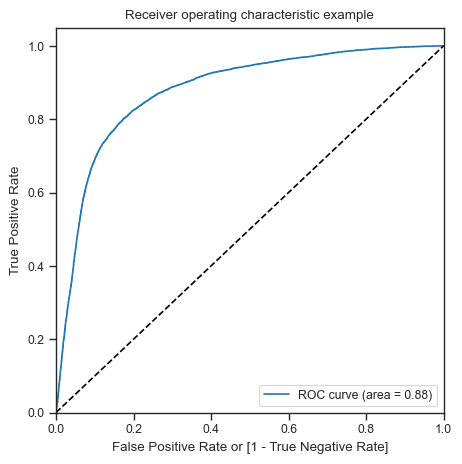

In [378]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, 
                                         y_train_pred_final.Churn_prob, drop_intermediate = False )
# Draw ROC
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

#### Finding Optimal Cutoff Point

In [379]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for num in numbers:
    y_train_pred_final[num]= y_train_pred_final.Churn_prob.map(lambda x: 1 if x > num else 0)
y_train_pred_final.head()

,Churn,Churn_prob,Customer ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.568368,0,1,1,1,1,1,1,1,0,0,0,0
1,0,0.265919,1,0,1,1,1,0,0,0,0,0,0,0
2,0,0.915944,2,1,1,1,1,1,1,1,1,1,1,1
3,0,0.380489,3,0,1,1,1,1,0,0,0,0,0,0
4,0,0.605010,4,1,1,1,1,1,1,1,1,0,0,0


In [380]:
# let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.645620  0.975642  0.315598
0.2   0.2  0.717135  0.949065  0.485206
0.3   0.3  0.767463  0.921219  0.613706
0.4   0.4  0.798531  0.878738  0.718324
0.5   0.5  0.812216  0.825478  0.798954
0.6   0.6  0.810446  0.761756  0.859136
0.7   0.7  0.790156  0.673782  0.906531
0.8   0.8  0.711746  0.477544  0.945947
0.9   0.9  0.593020  0.206858  0.979182


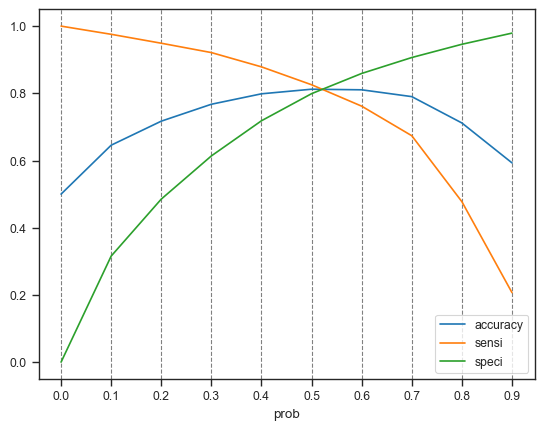

In [381]:
# Plot accuracy sensitivity and specificity for various probabilities.
ax = cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(num)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

* From above Graph, 0.52 is cut-off point to get the balance of model performance

In [382]:
y_train_pred_final['Final_predicted'] = y_train_pred_final.Churn_prob.map( lambda x: 1 if x > 0.52 else 0)

y_train_pred_final.head()

,Churn,Churn_prob,Customer ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_predicted
0,0,0.568368,0,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.265919,1,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.915944,2,1,1,1,1,1,1,1,1,1,1,1,1
3,0,0.380489,3,0,1,1,1,1,0,0,0,0,0,0,0
4,0,0.605010,4,1,1,1,1,1,1,1,1,0,0,0,1


#### Precision and Recall


    Precision (TP / TP + FP) = Also known as Positive Predictive Value, it refers to the percentage of the results which are relevant.
    Recall (TP / TP + FN) = Also known as Sensitivity , it refers to the percentage of total relevant results correctly classified by the algorithm.



In [383]:
# using sklearn 
from sklearn.metrics import precision_score, recall_score

In [384]:
print ('Accuracy: ', accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Final_predicted))
print("Precision :",precision_score(y_train_pred_final.Churn , y_train_pred_final.Final_predicted))
print("Recall :",recall_score(y_train_pred_final.Churn, y_train_pred_final.Final_predicted))

Accuracy:  0.8126122794039945
Precision : 0.8122657940571066
Recall : 0.8131670717531438


* We have more balanced result of Precision and Recall with cutoff = 0.52

##### Precision and recall tradeoff

In [385]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)

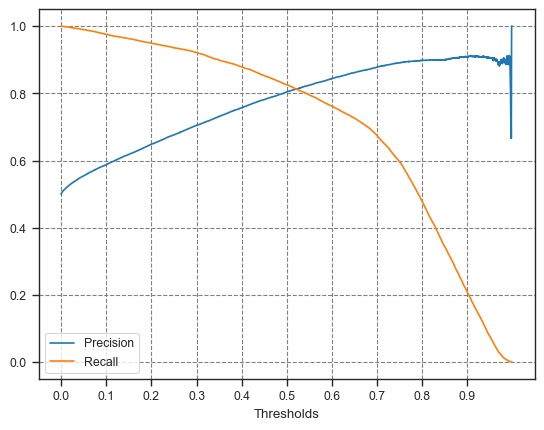

In [386]:
# Plotting a trade-off curve between precision and recall
trade_off_df = pd.DataFrame(columns = ['Thresholds','Precision','Recall'])

trade_off_df['Thresholds'] = thresholds
trade_off_df['Precision'] = p[:-1]
trade_off_df['Recall'] = r[:-1]

ax = trade_off_df.plot.line(x='Thresholds', y=['Precision','Recall'])
plt.xticks(num)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
ax.yaxis.grid(color='gray', linestyle='dashed')
plt.show()

## 5 - MODEL EVALUATION AND INTERPRETATION

### 5.1 Model Evaluation

#### Making predictions on the test set

In [387]:
X_test = X_test[cols]
X_test.head()

,arpu_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,loc_ic_t2m_mou_8,last_day_rch_amt_8,monthly_2g_8,monthly_3g_8,diff_rech_amt,diff_rech_num
1069,0.972347,-0.595277,2.423172,-0.367808,3.901102,-0.363729,-0.247265,-0.693752,-0.256607,-0.262315,0.585924,1.154879
19603,0.212610,-0.595277,-0.070225,0.053517,-0.442670,1.238523,0.321016,-0.431108,-0.256607,-0.262315,0.039185,0.429325
31,1.118754,-0.595277,4.987333,0.167298,-0.138937,1.682812,2.204537,0.882113,3.360623,-0.262315,0.629613,0.429325
2675,0.943778,-0.595277,-0.206189,-0.303394,-0.453762,3.534432,-0.507818,0.671997,-0.256607,-0.262315,-0.305336,-0.151118
6494,0.195022,-0.595277,-0.496886,-0.482689,3.343703,-0.210778,0.079505,-0.693752,-0.256607,-0.262315,0.172749,0.284214


In [388]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

# Making predictions on the test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1069     0.122429
19603    0.362831
31       0.002571
2675     0.445830
6494     0.399552
26554    0.020677
11620    0.913527
12760    0.100529
2892     0.749764
12190    0.129565
dtype: float64

In [389]:
# Converting y_test_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
1069,0.122429
19603,0.362831
31,0.002571
2675,0.445830
6494,0.399552


In [390]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [391]:
# Putting Customer ID to index
y_test_df['Customer ID'] = y_test_df.index

In [392]:
y_test_df.head()

,churn,Customer ID
1069,0,1069
19603,0,19603
31,0,31
2675,0,2675
6494,0,6494


In [393]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [394]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

In [395]:
y_pred_final.head()

,churn,Customer ID,0
0,0,1069,0.122429
1,0,19603,0.362831
2,0,31,0.002571
3,0,2675,0.445830
4,0,6494,0.399552


In [396]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_prob'})

In [397]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Customer ID','churn','Churn_prob'])

In [398]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Customer ID,churn,Churn_prob
0,1069,0,0.122429
1,19603,0,0.362831
2,31,0,0.002571
3,2675,0,0.445830
4,6494,0,0.399552


In [399]:
y_pred_final['Final_predicted'] = y_pred_final.Churn_prob.map(lambda x: 1 if x > 0.52 else 0)

In [400]:
# Check the overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final.churn, y_pred_final.Final_predicted))

Accuracy : 0.8112946067675251


In [401]:
# Making the confusion matrix
cfs_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.Final_predicted )
cfs_test

array([[6617, 1511],
       [ 123,  408]], dtype=int64)

In [402]:
TP = cfs_test[1,1] # true positive 
TN = cfs_test[0,0] # true negatives
FP = cfs_test[0,1] # false positives
FN = cfs_test[1,0] # false negatives

In [403]:
# Sensitivity of our logistic regression model
print("Sensitivity - Recall: ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity : ",TN / float(TN+FP))

# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

# positive predictive value 
print("Positive Predictive Value:",TP / float(TP+FP))

# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Sensitivity - Recall:  0.768361581920904
Specificity :  0.8140994094488189
False Positive Rate : 0.1859005905511811
Positive Predictive Value: 0.2126107347576863
Negative predictive value : 0.9817507418397626


In [405]:
print ('Accuracy: ', accuracy_score(y_pred_final.churn, y_pred_final.Final_predicted ))
print ('F1 score: ', f1_score(y_pred_final.churn, y_pred_final.Final_predicted))
print ('Precision: ', precision_score(y_pred_final.churn, y_pred_final.Final_predicted ))
print ('Recall: ', recall_score(y_pred_final.churn, y_pred_final.Final_predicted ))
print ('\n clasification report:\n', classification_report(y_pred_final.churn, y_pred_final.Final_predicted ))
print ('\n confussion matrix:\n',confusion_matrix(y_pred_final.churn, y_pred_final.Final_predicted ))

Accuracy:  0.8112946067675251
F1 score:  0.33306122448979597
Precision:  0.2126107347576863
Recall:  0.768361581920904

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89      8128
           1       0.21      0.77      0.33       531

    accuracy                           0.81      8659
   macro avg       0.60      0.79      0.61      8659
weighted avg       0.93      0.81      0.86      8659


 confussion matrix:
 [[6617 1511]
 [ 123  408]]


**Model Performance on train set:**

    Accuracy:  0.8126122794039945
    Precision : 0.8122657940571066
    Recall : 0.8131670717531438
    
**Model Performance on test set:**
    
    Accuracy:  0.8112946067675251
    Precision:  0.2126107347576863
    Recall:  0.768361581920904
    
    

### Observations:

* For Recall = 0.77 as Evaluation Metric, the Performance of Model is still good on test set

### 5.1 Final model Interpretation

#### Coefficients of variables

In [411]:
coef_df = pd.DataFrame(res.params)
coef_df.reset_index(inplace=True)
coef_df.columns = ['feature', 'coef']
coef_df['abs_coef'] = np.abs(coef_df['coef'] )
coef_df.sort_values(by='abs_coef', ascending=False)

,feature,coef,abs_coef
2,roam_og_mou_8,0.574914,0.574914
4,loc_og_t2m_mou_8,-0.523822,0.523822
11,diff_rech_amt,-0.508358,0.508358
7,loc_ic_t2m_mou_8,-0.491855,0.491855
8,last_day_rch_amt_8,-0.453236,0.453236
12,diff_rech_num,-0.442244,0.442244
9,monthly_2g_8,-0.425094,0.425094
3,loc_og_t2t_mou_8,-0.414152,0.414152
10,monthly_3g_8,-0.360972,0.360972
1,arpu_8,0.298149,0.298149


##### roam_og_mou_8

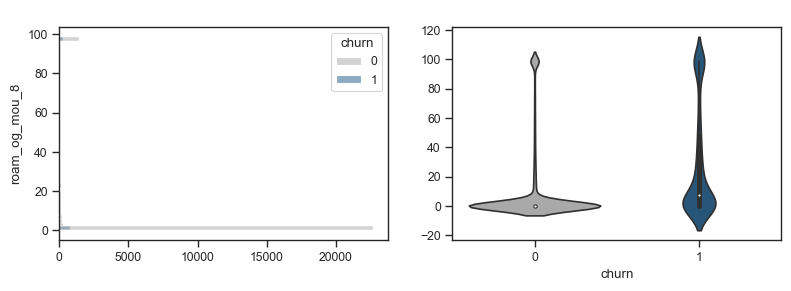

In [231]:
bi_plot(data=churn_data_std, col='roam_og_mou_8', target='churn', var_type='n', figsize=(8,3))

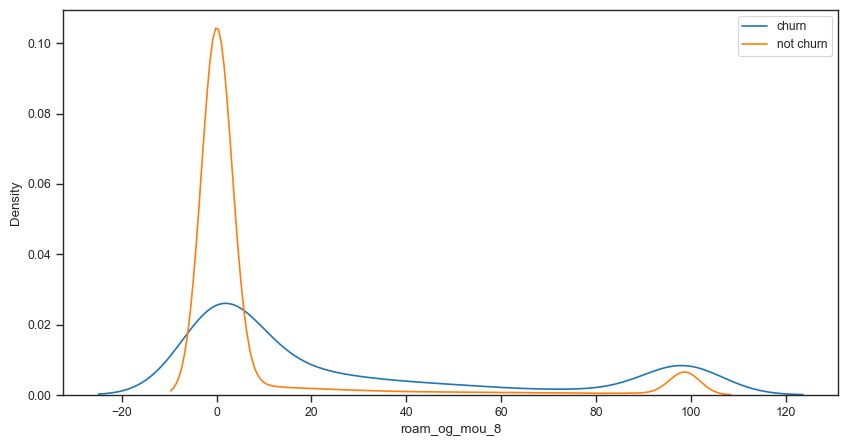

In [232]:
# Plotting roam_og_mou_8 predictor for churn and not churn customers
churn = churn_data_std[churn_data_std.churn==1]
not_churn = churn_data_std[churn_data_std.churn==0]

fig = plt.figure(figsize=(10,5))
sns.distplot(churn['roam_og_mou_8'],label='churn',hist=False)
sns.distplot(not_churn['roam_og_mou_8'],label='not churn',hist=False)
plt.legend(loc='best')
plt.show()

##### loc_og_t2m_mou_8

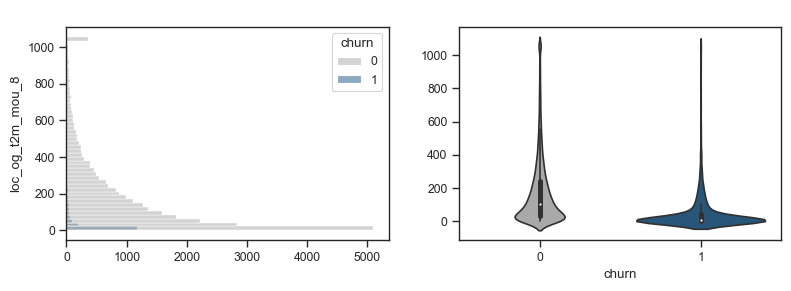

In [412]:
bi_plot(data=churn_data_std, col='loc_og_t2m_mou_8', target='churn', var_type='n', figsize=(8,3))

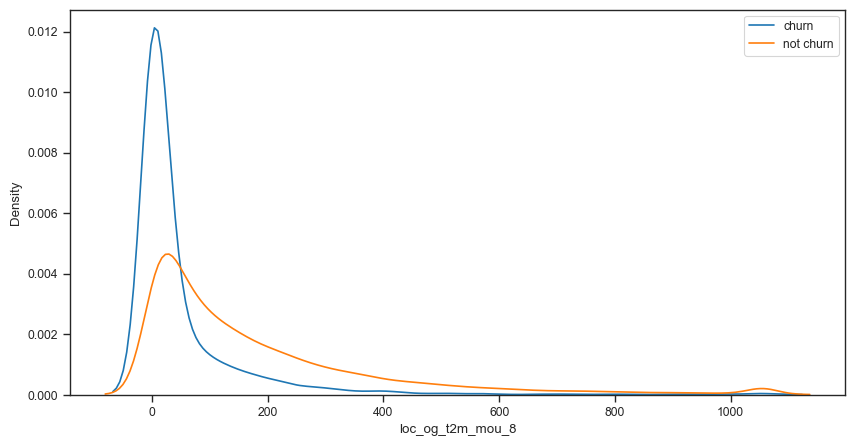

In [413]:
fig = plt.figure(figsize=(10,5))
sns.distplot(churn['loc_og_t2m_mou_8'],label='churn',hist=False)
sns.distplot(not_churn['loc_og_t2m_mou_8'],label='not churn',hist=False)
plt.legend(loc='best')
plt.show()

##### loc_ic_t2m_mou_8

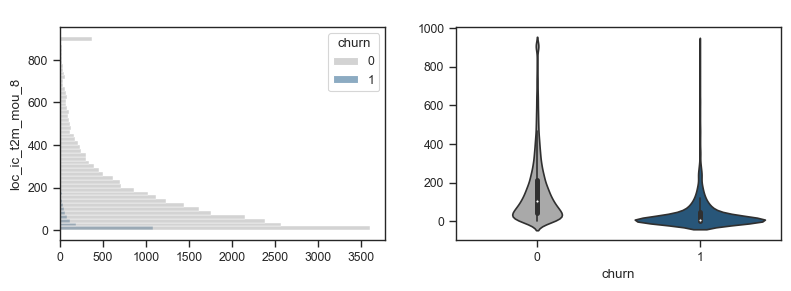

In [414]:
bi_plot(data=churn_data_std, col='loc_ic_t2m_mou_8', target='churn', var_type='n', figsize=(8,3))

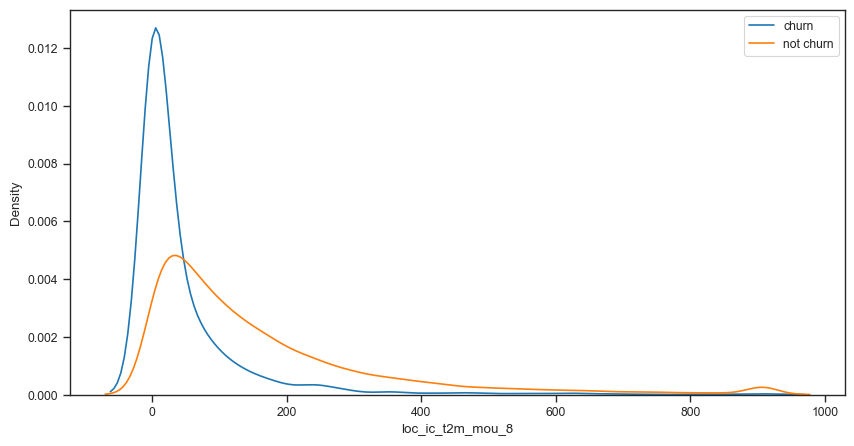

In [415]:
fig = plt.figure(figsize=(10,5))
sns.distplot(churn['loc_ic_t2m_mou_8'],label='churn',hist=False)
sns.distplot(not_churn['loc_ic_t2m_mou_8'],label='not churn',hist=False)
plt.legend(loc='best')
plt.show()

##### diff_rech_amt

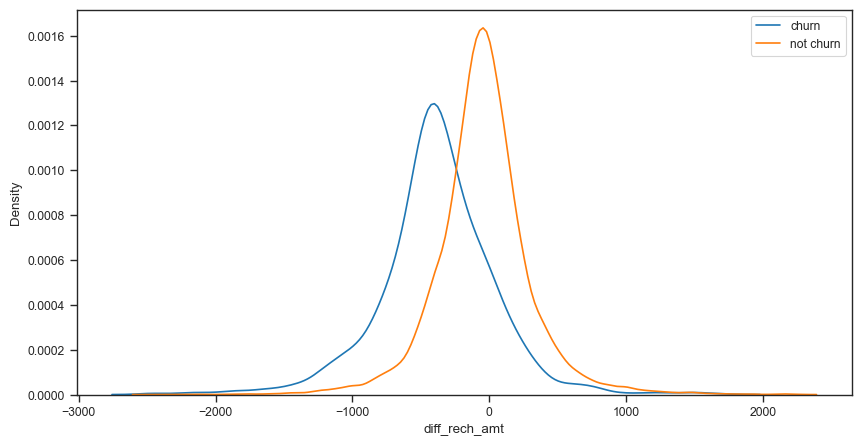

In [416]:
fig = plt.figure(figsize=(10,5))
sns.distplot(churn['diff_rech_amt'],label='churn',hist=False)
sns.distplot(not_churn['diff_rech_amt'],label='not churn',hist=False)
plt.legend(loc='best')
plt.show()


#### Recommendations:

* The company should focus on  **"customer who have roaming call"** in **"action phase"** as these are more likely to churn. There may be some reasons like quality of roaming service, the price too high,...
* The company should focus on customers who have **less MOU in local outgoing call in action phase**. The dropping down of MOU may lead to churn.
* The company should focus on customers who have **less MOU in standard outgoing call in action phase**. The dropping down of MOU may lead to churn.
* The company should focus on customers who have **less use of monthly 2g and 3g in action phase**. The dropping down of number may lead to churn.
* The company should focus on customers who have drastically **dropped down in recharge amount/recharge number from good phase to action phase**, since it's the sign of churn.
* The company should focus on customers who have **last recharge with small amount** in action phase in comparation to others, since it's the sign of churn.
